# ***Second Assignment***

## **Task 1: Exploratory Data Analysis**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy import median
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.plots import plot_convergence

In [13]:
data = pd.read_csv('hour.csv', header=0)
data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

### **Statistical**

In [14]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

The dataset contains 17,379 hourly entries, with the target variable cnt (total bike rentals) ranging from 1 to 977. The mean count is approximately 189, while the median is 142, indicating a right-skewed distribution with a small number of extreme high-rental hours. The standard deviation is relatively high (~181), highlighting substantial variation in rental volume across different times. Registered users account for the majority of rentals, with a mean of around 153.8 compared to 35.7 for casual users. This suggests that most usage comes from consistent, likely commuter-based, behavior rather than occasional or tourist activity.

Weather-related features like temp, atemp, hum, and windspeed are normalized between 0 and 1. The average normalized temperature is around 0.49, while humidity tends to be slightly high, averaging 0.63. Windspeed shows a low mean (~0.19), indicating generally calm weather conditions during bike usage. Binary indicators such as holiday and workingday show class imbalance: holidays occur infrequently (~2.9%), while most records fall on working days (~68%). Temporal features such as hour, weekday, month, and season are evenly distributed across their expected ranges, enabling comprehensive analysis of usage trends over time.

In [15]:
# Exclude non-numeric columns before calculating correlation
data.select_dtypes(include=[np.number]).corr()

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.003988   
casual      0.158295  0.120206  0.142779  0.068457  0.301202  0.031564   
registered  0.282046  0.174226  0.253684  0.122273  0.374141 -0.047345   
cnt         0.278379  0.178056  0.250495  0.120638  0.394071 -0.030927   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.001357   -0.003416   -0.014198  0.136178  0.137615  0.009577   
season     -0.002335    0.013743   -0.014524  0.312025  0.319380  0.150625   
yr         -0.004485   -0.002196   -0.019157  0.040913  0.039222 -0.083546   
mnth        0.010400   -0.003477    0.005400  0.201691  0.208096  0.164411   
hr         -0.003498    0.002285   -0.020203  0.137603  0.133750 -0.276498   
holiday    -0.102088   -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   
weekday     1.000000    0.035955    0.003311 -0.001795 -0.008821 -0.037158   
workingday  0.035955    1.000000    0.044672  0.055390  0.054667  0.015688   
weathersit  0.003311    0.044672    1.000000 -0.102640 -0.105563  0.418130   
temp       -0.001795    0.055390   -0.102640  1.000000  0.987672 -0.069881   
atemp      -0.008821    0.054667   -0.105563  0.987672  1.000000 -0.051918   
hum        -0.037158    0.015688    0.418130 -0.069881 -0.051918  1.000000   
windspeed   0.011502   -0.011830    0.026226 -0.023125 -0.062336 -0.290105   
casual      0.032721   -0.300942   -0.152628  0.459616  0.454080 -0.347028   
registered  0.021578    0.134326   -0.120966  0.335361  0.332559 -0.273933   
cnt         0.026900    0.030284   -0.142426  0.404772  0.400929 -0.322911   

            windspeed    casual  registered       cnt  
instant     -0.074505  0.158295    0.282046  0.278379  
season      -0.149773  0.120206    0.174226  0.178056  
yr          -0.008740  0.142779    0.253684  0.250495  
mnth        -0.135386  0.068457    0.122273  0.120638  
hr           0.137252  0.301202    0.374141  0.394071  
holiday      0.003988  0.031564   -0.047345 -0.030927  
weekday      0.011502  0.032721    0.021578  0.026900  
workingday  -0.011830 -0.300942    0.134326  0.030284  
weathersit   0.026226 -0.152628   -0.120966 -0.142426  
temp        -0.023125  0.459616    0.335361  0.404772  
atemp       -0.062336  0.454080    0.332559  0.400929  
hum         -0.290105 -0.347028   -0.273933 -0.322911  
windspeed    1.000000  0.090287    0.082321  0.093234  
casual       0.090287  1.000000    0.506618  0.694564  
registered   0.082321  0.506618    1.000000  0.972151  
cnt          0.093234  0.694564    0.972151  1.000000

The correlation matrix shows that the total rental count (cnt) has the strongest positive correlation with the number of registered users (r = 0.69), followed by casual users (r = 0.46), which is expected since cnt is the sum of these two variables. Among the environmental variables, temp and atemp both show moderate positive correlations with cnt (around 0.40), suggesting that warmer temperatures are associated with higher bike usage. Conversely, hum (humidity) and windspeed show weak to moderate negative correlations with cnt (r = -0.32 and r = -0.14, respectively), indicating that increased humidity and wind may slightly reduce rental activity. Poor weather conditions (weathersit) also have a mild negative effect (r = -0.14). Among the temporal features, the hour of the day (hr) shows a moderate positive correlation (r = 0.39), likely capturing commuting patterns, while features like weekday, holiday, and workingday have very weak correlations, suggesting they have minimal linear influence on the total rental volume.

In [16]:
data.groupby('hr')['cnt'].mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

The hourly average rental counts highlight clear patterns in user behavior across the day. Rentals are lowest during the early morning hours (midnight to around 5 AM), with the lowest average around hour 4 (~6.35 rentals). Starting at 6 AM, demand rises sharply, peaking during typical commute times. The first major spike occurs at 8 AM (~359 rentals), followed by a dip and then a second, even higher peak around 5 PM (hour 17) with an average of ~461 rentals. This suggests strong commuting usage by registered users. Usage gradually tapers off into the evening, with moderate activity until about 9 PM and a drop thereafter. The clear two-peak pattern indicates that bike rentals are heavily influenced by work and school commuting schedules.

In [17]:
data.groupby('weekday')['cnt'].mean()

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64

The average bike rental count by weekday shows relatively consistent demand throughout the week, with a slight dip on Sundays (weekday 0, ~177 rentals) and a gradual increase toward midweek. The highest average rentals occur on Thursdays and Fridays (weekdays 4 and 5), both slightly above 196 rentals. Saturdays (weekday 6) also show high usage (~190), suggesting strong weekend activity—likely driven by casual users. While weekday averages remain close in value (within ~20 rentals of each other), the small variations hint at routine commuting patterns during the workweek, with a blend of leisure activity on weekends.

In [18]:
data.groupby('season')['cnt'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

The average rental count varies noticeably across seasons, reflecting clear seasonal trends in bike usage. Summer (season 3) sees the highest average with approximately 236 rentals per hour, followed by spring (season 2) at 208, and fall (season 4) at around 199. Winter (season 1) records the lowest average, with only about 111 rentals per hour, which is less than half the summer average. This pattern strongly suggests that warmer weather encourages biking, while colder winter conditions likely discourage it, highlighting the sensitivity of rental behavior to seasonal climate changes.

### **Graphical**

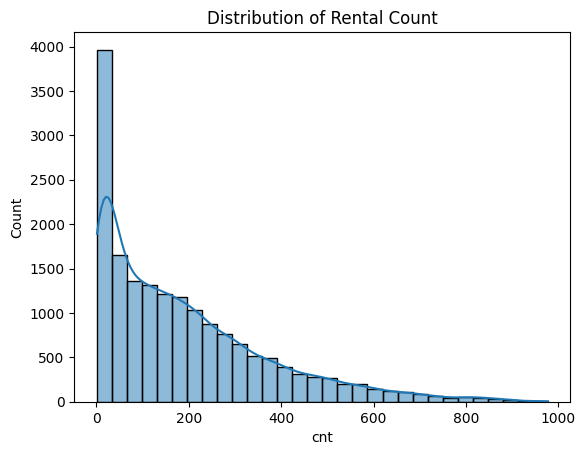

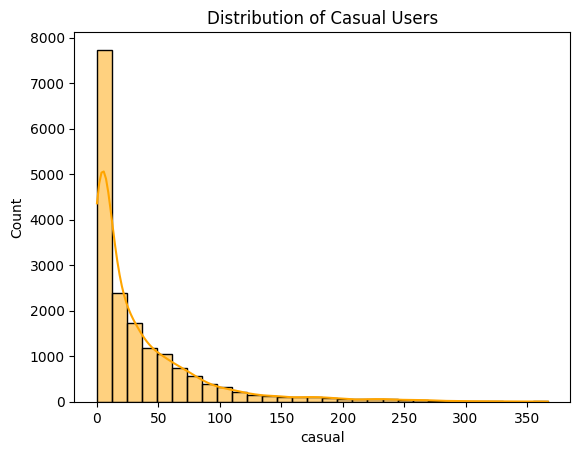

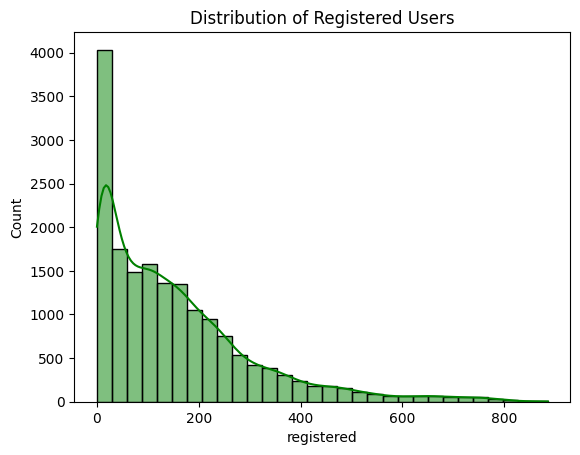

In [19]:
# Distribution of counts
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Rental Count')
plt.show()

# Casual and Registered users
sns.histplot(data['casual'], bins=30, kde=True, color='orange')
plt.title('Distribution of Casual Users')
plt.show()

sns.histplot(data['registered'], bins=30, kde=True, color='green')
plt.title('Distribution of Registered Users')
plt.show()

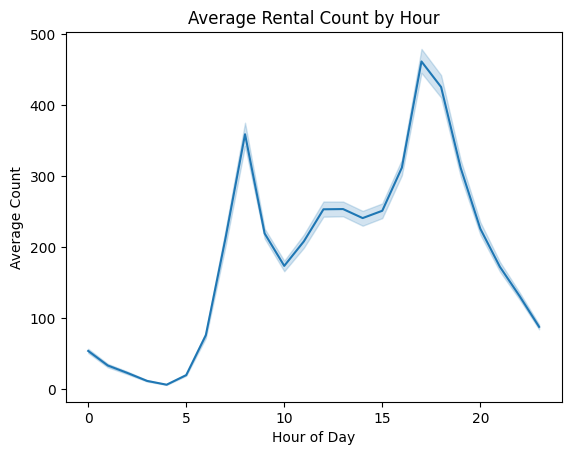

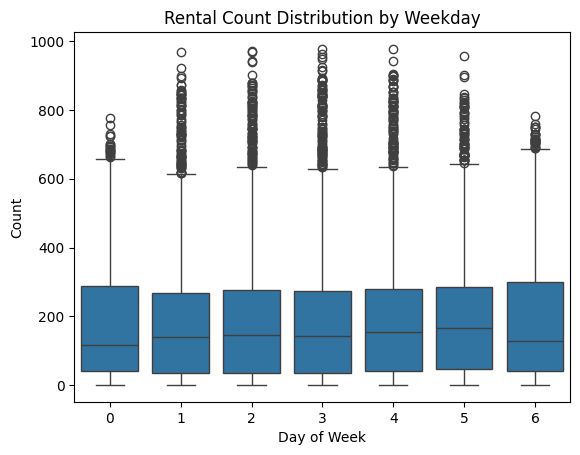

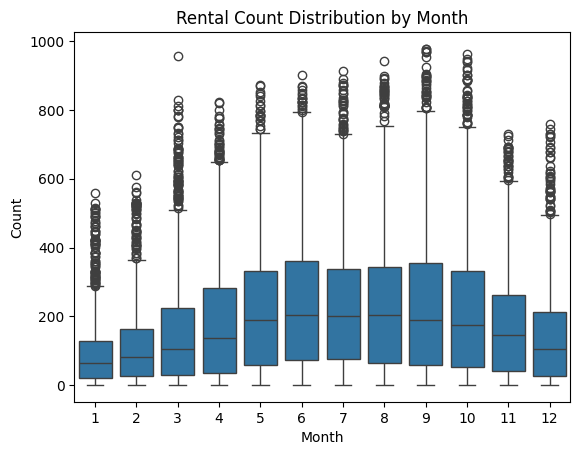

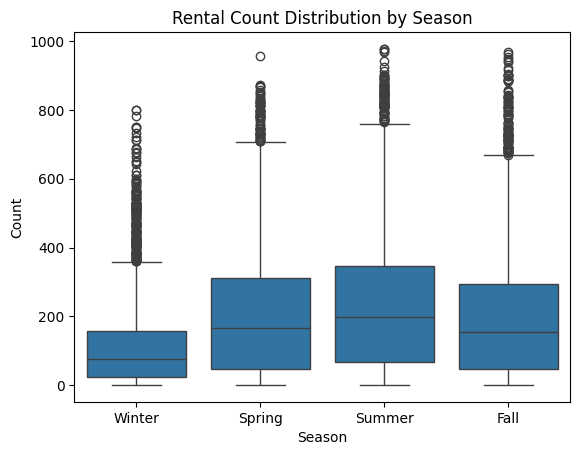

In [20]:
sns.lineplot(x='hr', y='cnt', data=data, estimator='mean')
plt.title('Average Rental Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.show()

sns.boxplot(x='weekday', y='cnt', data=data)
plt.title('Rental Count Distribution by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='mnth', y='cnt', data=data)
plt.title('Rental Count Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
data['season'] = data['season'].map(season_map)

sns.boxplot(x='season', y='cnt', data=data)
plt.title('Rental Count Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

reverse_season_map = {v: k for k, v in season_map.items()}
data['season'] = data['season'].map(reverse_season_map)

The line plot of average rental count by hour shows two clear peaks: one around 8 AM and another, even higher, around 5 PM. These align with typical morning and evening commuting hours, suggesting that bike usage is strongly influenced by workday schedules. Rental activity is lowest between midnight and 5 AM, then gradually increases as the day progresses.

The boxplot by weekday shows fairly consistent rental distributions across all days, with only slight variations. Weekdays appear to have similar median and spread, with a high number of outliers each day, indicating bursts of rental activity. This suggests that day of the week has only a modest effect on overall usage.

The monthly boxplot reveals a distinct seasonal trend. Rentals increase steadily from January through June, peak between July and September, and then decline again in the colder months. The spread also widens in warmer months, reflecting both higher demand and more variability in usage.

Similarly, the seasonal boxplot confirms this trend. Summer and spring have the highest medians and largest spreads in rental counts, while winter has the lowest, with a tighter distribution. This reinforces the strong effect of seasonal weather conditions on rental volume.

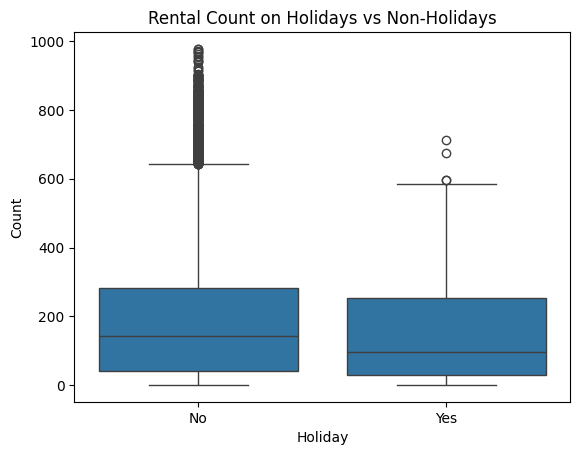

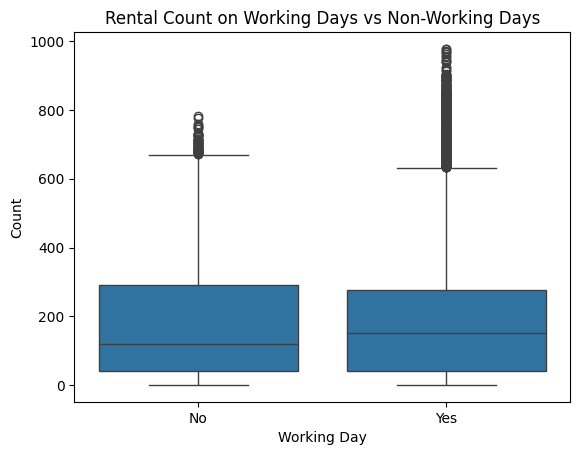

In [21]:
data['holiday'] = data['holiday'].map({0: 'No', 1: 'Yes'})

sns.boxplot(x='holiday', y='cnt', data=data)
plt.title('Rental Count on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

data['workingday'] = data['workingday'].map({0: 'No', 1: 'Yes'})

sns.boxplot(x='workingday', y='cnt', data=data)
plt.title('Rental Count on Working Days vs Non-Working Days')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

The boxplot comparing holidays and non-holidays shows that bike rentals are generally lower on holidays. The median rental count on holidays is noticeably lower, and the overall distribution is narrower, with fewer extreme values. This suggests that fewer people rent bikes during holidays, likely due to reduced commuting and possibly less structured routines.

In contrast, the plot comparing working and non-working days shows that rental counts are higher and more variable on working days. The median is slightly elevated, and there are more high-value outliers, indicating more frequent peak usage. This supports the idea that bike rentals are influenced by commuting patterns and work-related travel.

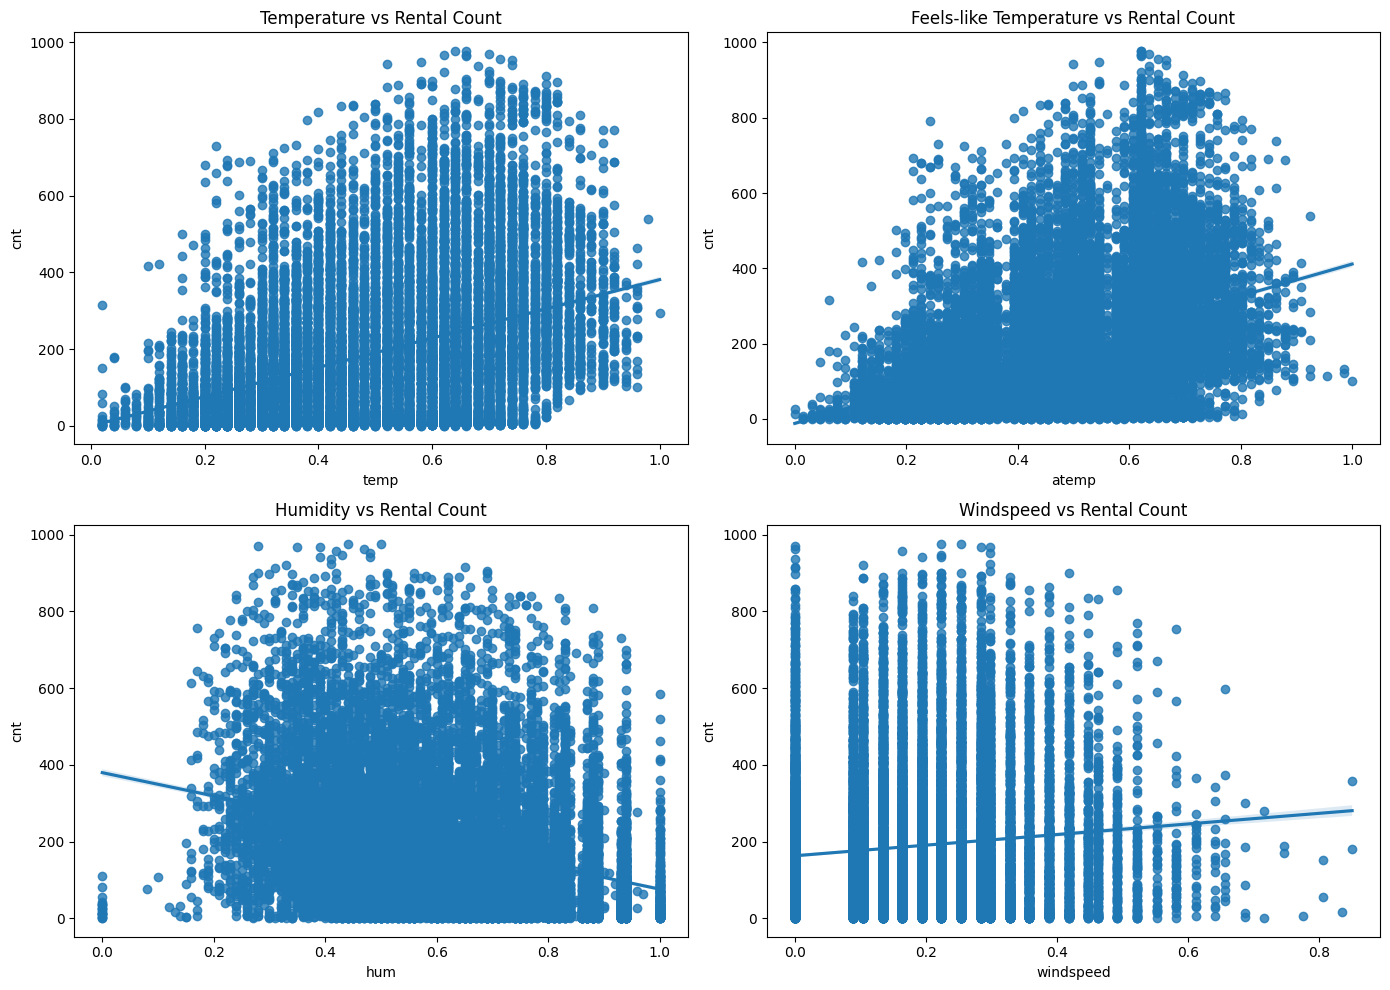

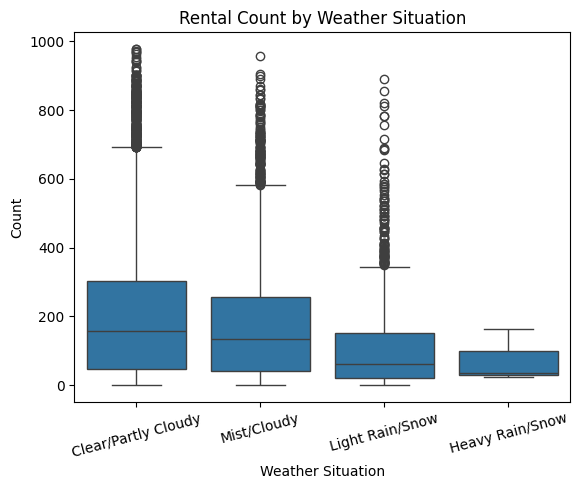

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x='temp', y='cnt', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Temperature vs Rental Count')

sns.regplot(x='atemp', y='cnt', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Feels-like Temperature vs Rental Count')

sns.regplot(x='hum', y='cnt', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Humidity vs Rental Count')

sns.regplot(x='windspeed', y='cnt', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Windspeed vs Rental Count')

plt.tight_layout()
plt.show()

weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
data['weathersit'] = data['weathersit'].map(weather_map)

sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Rental Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

reverse_weather_map = {v: k for k, v in weather_map.items()}

data['weathersit'] = data['weathersit'].map(reverse_weather_map)

The scatter plots reveal a positive relationship between both actual temperature (temp) and feels-like temperature (atemp) with rental count. As temperatures rise, rentals increase—peaking in moderate-to-warm conditions before leveling off, which suggests an ideal biking temperature range. On the other hand, humidity shows a slight negative correlation, with higher humidity generally linked to fewer rentals. This effect is subtle but suggests that damp or muggy conditions discourage biking. Windspeed appears to have little to no clear impact on rental count, with most rentals occurring under moderate wind conditions.

The boxplot of weathersit (weather situation) provides a clearer distinction. Rental counts are highest on clear or partly cloudy days, with both the median and spread being noticeably greater. As weather conditions worsen—moving from cloudy/misty to light rain or snow, and especially to heavy rain or snow—rental counts drop significantly. This reinforces the strong role of perceived weather conditions in influencing outdoor activity like bike rentals.

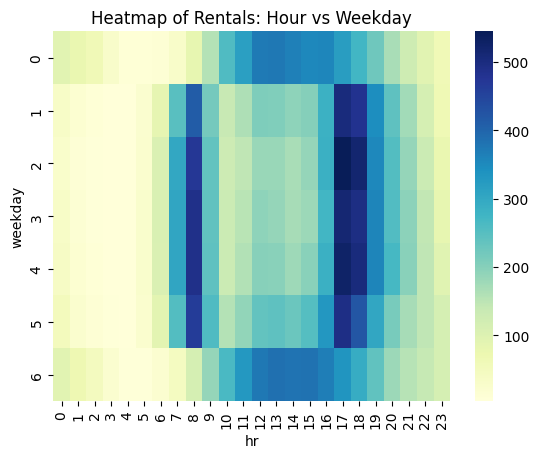

In [23]:
# Hour vs Weekday Heatmap
pivot = data.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap of Rentals: Hour vs Weekday')
plt.show()


The heatmap highlights distinct daily and weekly patterns in bike rental behavior. On weekdays (Monday to Friday, represented by 1–5), we observe two clear peaks in usage: one around 8 AM and another around 5–6 PM, aligning with standard commute times. This pattern is strongest on Tuesdays, Wednesdays, and Thursdays.

In contrast, weekends (Saturday and Sunday, days 0 and 6) show more diffuse activity, with higher counts spread across midday and early evening hours rather than sharp peaks. This suggests that weekday usage is driven by commuting, while weekend usage is more leisure-oriented and evenly distributed throughout the day.

This visualization effectively supports the idea of time-dependent demand, crucial for scheduling bike redistribution or staffing.

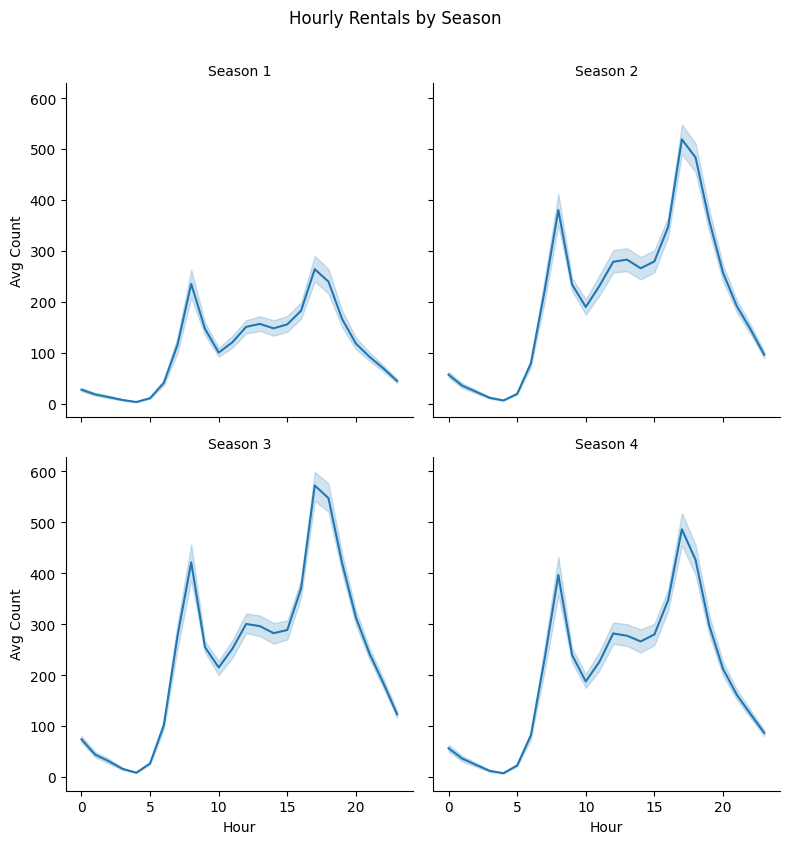

In [24]:
# By Season
g = sns.FacetGrid(data, col='season', col_wrap=2, height=4)
g.map(sns.lineplot, 'hr', 'cnt', estimator='mean')
g.set_titles("Season {col_name}")
g.set_axis_labels("Hour", "Avg Count")
plt.suptitle('Hourly Rentals by Season', y=1.05)
plt.show()

Across all four seasons, the data shows a consistent bimodal pattern, with sharp peaks in the morning (around 8 AM) and evening (around 5–6 PM), reflecting typical commute times. However, rental volume is clearly influenced by season.

Summer shows the highest overall counts, with both peaks reaching above 400–500 rentals per hour, and steady midday activity as well.

Spring and Fall follow similar shapes, though slightly lower in volume. Spring, in particular, maintains elevated counts through mid-afternoon, suggesting leisure usage.

Winter has the lowest usage overall, with reduced morning and evening peaks and a flatter midday curve, likely due to colder weather discouraging bike use.

These plots highlight how seasonality affects not just total demand, but also the intensity and spread of usage across the day.

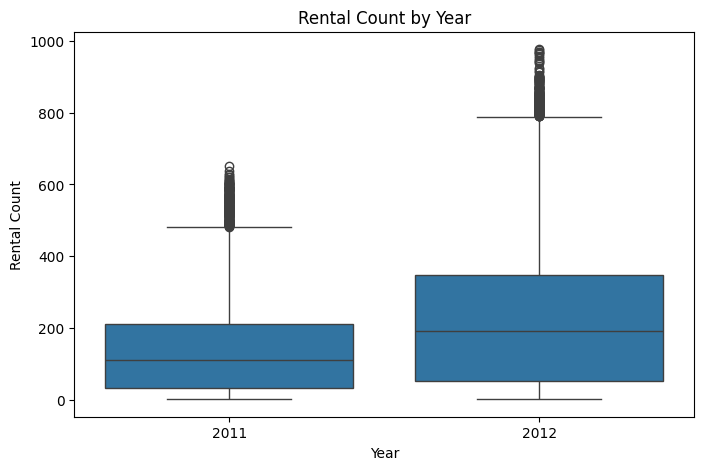

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='yr', y='cnt', data=data)
plt.xticks([0, 1], ['2011', '2012'])
plt.title('Rental Count by Year')
plt.xlabel('Year')
plt.ylabel('Rental Count')
plt.show()

The boxplot shows a clear increase in bike rentals from 2011 to 2012. The median rental count is noticeably higher in 2012, and the interquartile range (IQR) is also wider, suggesting not just growth but more variability in usage. The number and magnitude of high-value outliers have increased as well, indicating more frequent spikes in demand. This trend likely reflects growing adoption of the bike-sharing program over time, as more users became aware of and engaged with the service.

### **Considerations**

In [26]:
data['dteday'] = pd.to_datetime(data['dteday'])

data['year_extracted']    = data['dteday'].dt.year
data['month_extracted']   = data['dteday'].dt.month
data['weekday_extracted'] = data['dteday'].dt.weekday
data['day_of_year']       = data['dteday'].dt.dayofyear
data['date_ordinal']      = data['dteday'].map(pd.Timestamp.toordinal)

yr_mapped = data['yr'].map({0: 2011, 1: 2012})
print("Year match:", (data['year_extracted'] == yr_mapped).all())
print("Month match:", (data['month_extracted'] == data['mnth']).all())
print("Weekday match:", (data['weekday_extracted'] == data['weekday']).all())

data.drop(columns=['year_extracted', 'month_extracted', 'weekday_extracted'], inplace=True)

Year match: True
Month match: True
Weekday match: False


To prepare the dataset for modeling, the dteday column was first converted to a datetime object, allowing for the extraction of time-based features such as day_of_year, and date_ordinal. These extracted features capture valuable temporal patterns like seasonality and long-term trends, which are critical in time series regression tasks. However, other extracted fields — year_extracted, month_extracted, and weekday_extracted — were dropped because they were either exact duplicates of existing columns (yr, mnth, weekday) or used a different convention (e.g., weekday encoding), which could create inconsistencies. The original columns were retained for consistency with other related features in the dataset, such as holiday and workingday.

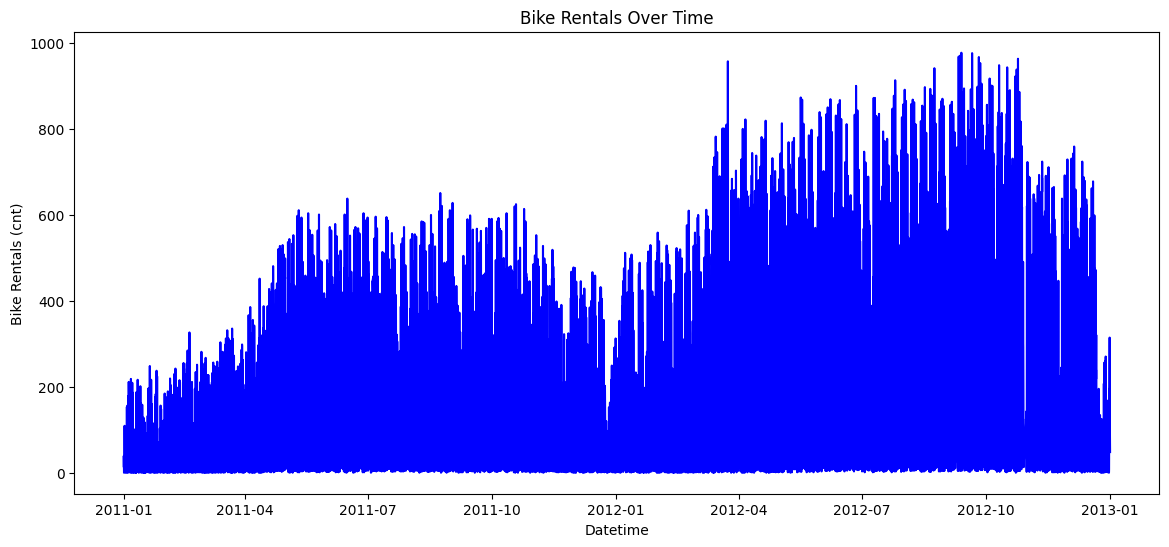

In [27]:
data['datetime'] = data['dteday'] + pd.to_timedelta(data['hr'], unit='h')
data.sort_values('datetime', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(data['datetime'], data['cnt'], color='blue')
plt.xlabel('Datetime')
plt.ylabel('Bike Rentals (cnt)')
plt.title('Bike Rentals Over Time')
plt.show()


This line plot visualizes the distribution of bike rental counts over time, revealing a clear seasonal pattern with higher rentals during warmer months and lower counts in winter. The distribution is uneven, with denser peaks in mid-year and sparser values at the start and end of each year, reflecting the cyclical nature of bike usage. There’s also a gradual increase in rental volume from 2011 to 2012, showing overall system growth. These trends highlight the importance of extracting features like month, season, and day-of-year from dteday. The temporal progression further supports using a time-based data split and confirms that the instant index is redundant, as chronological order is captured more meaningfully through datetime-based features.

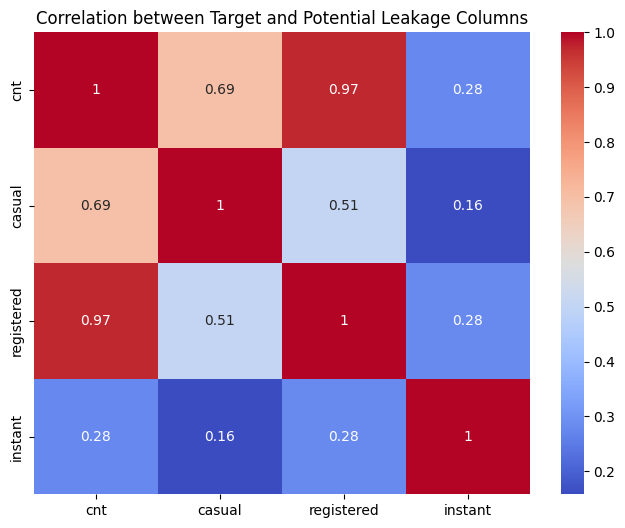

In [28]:
leakage_cols = ['cnt', 'casual', 'registered', 'instant']
plt.figure(figsize=(8, 6))
sns.heatmap(data[leakage_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Target and Potential Leakage Columns')
plt.show()


This heatmap displays the correlation between the target variable cnt and three potentially problematic columns: casual, registered, and instant. Both casual and registered show extremely high correlations with cnt (0.69 and 0.97 respectively), confirming that they directly contribute to the target value (since cnt = casual + registered). Including them would result in data leakage, giving models unfair predictive power. On the other hand, instant shows a weak correlation with cnt (0.28), implying it does not meaningfully capture trends on its own. Combined with its role as a simple row index, this supports its removal from the dataset as well.

In [29]:
data = data.drop(columns=['instant', 'casual', 'registered', 'dteday'])
data

season  yr  mnth  hr holiday  weekday workingday  weathersit  temp  \
0           1   0     1   0      No        6         No           1  0.24   
1           1   0     1   1      No        6         No           1  0.22   
2           1   0     1   2      No        6         No           1  0.22   
3           1   0     1   3      No        6         No           1  0.24   
4           1   0     1   4      No        6         No           1  0.24   
...       ...  ..   ...  ..     ...      ...        ...         ...   ...   
17374       1   1    12  19      No        1        Yes           2  0.26   
17375       1   1    12  20      No        1        Yes           2  0.26   
17376       1   1    12  21      No        1        Yes           1  0.26   
17377       1   1    12  22      No        1        Yes           1  0.26   
17378       1   1    12  23      No        1        Yes           1  0.26   

        atemp   hum  windspeed  cnt  day_of_year  date_ordinal  \
0      0.2879  0.81     0.0000   16            1        734138   
1      0.2727  0.80     0.0000   40            1        734138   
2      0.2727  0.80     0.0000   32            1        734138   
3      0.2879  0.75     0.0000   13            1        734138   
4      0.2879  0.75     0.0000    1            1        734138   
...       ...   ...        ...  ...          ...           ...   
17374  0.2576  0.60     0.1642  119          366        734868   
17375  0.2576  0.60     0.1642   89          366        734868   
17376  0.2576  0.60     0.1642   90          366        734868   
17377  0.2727  0.56     0.1343   61          366        734868   
17378  0.2727  0.65     0.1343   49          366        734868   

                 datetime  
0     2011-01-01 00:00:00  
1     2011-01-01 01:00:00  
2     2011-01-01 02:00:00  
3     2011-01-01 03:00:00  
4     2011-01-01 04:00:00  
...                   ...  
17374 2012-12-31 19:00:00  
17375 2012-12-31 20:00:00  
17376 2012-12-31 21:00:00  
17377 2012-12-31 22:00:00  
17378 2012-12-31 23:00:00  

[17379 rows x 16 columns]

In addition to these, the columns casual and registered were dropped due to data leakage: they are components of the target variable cnt and including them would artificially inflate model performance. The instant column, which serves only as a row index, was also removed because its time-ordering function is already captured by date_ordinal and datetime.

### **Identification**

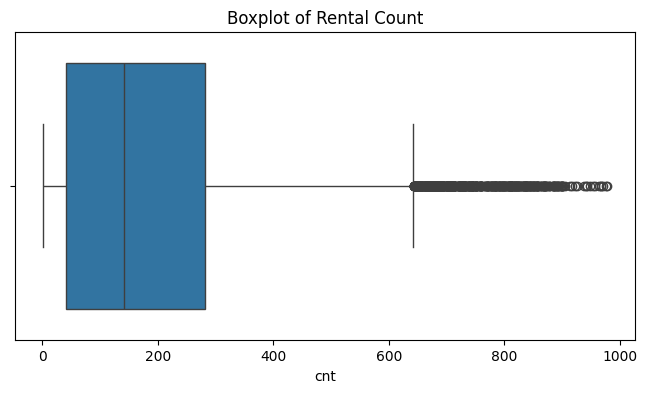

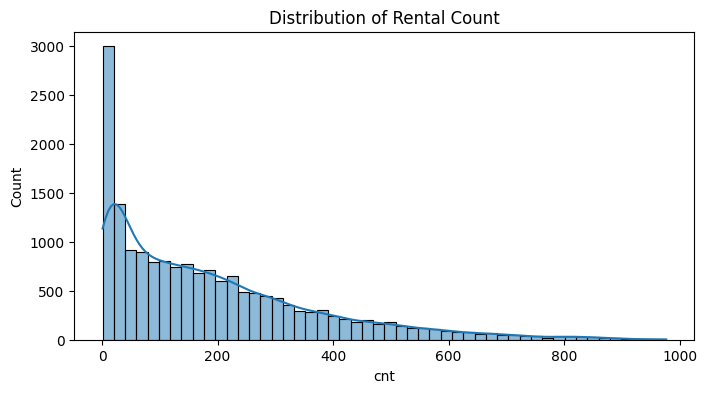

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['cnt'])
plt.title('Boxplot of Rental Count')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data['cnt'], bins=50, kde=True)
plt.title('Distribution of Rental Count')
plt.xlabel('cnt')
plt.show()

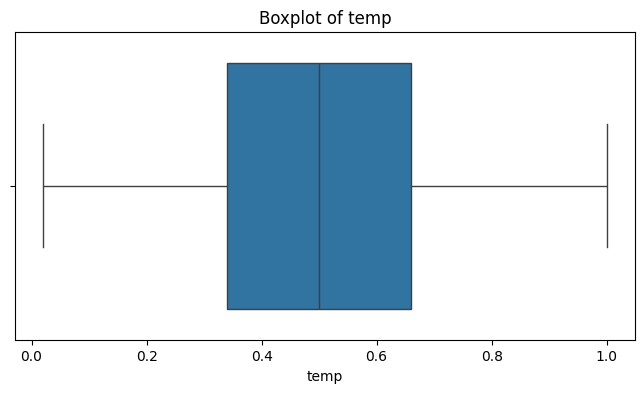

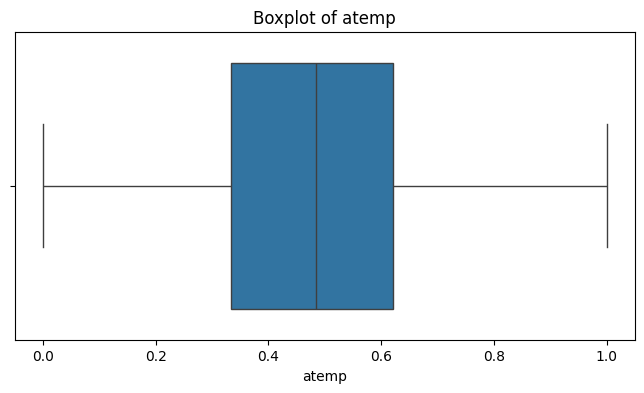

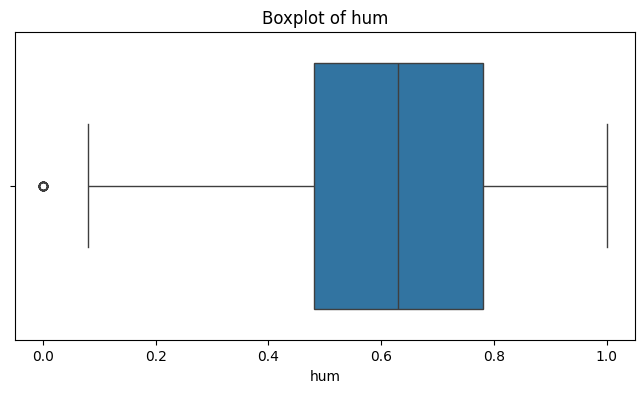

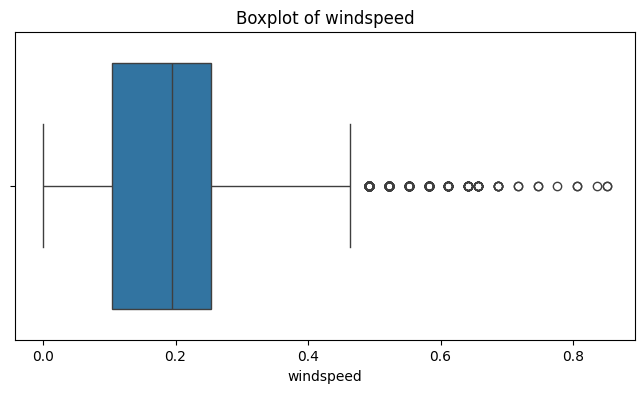

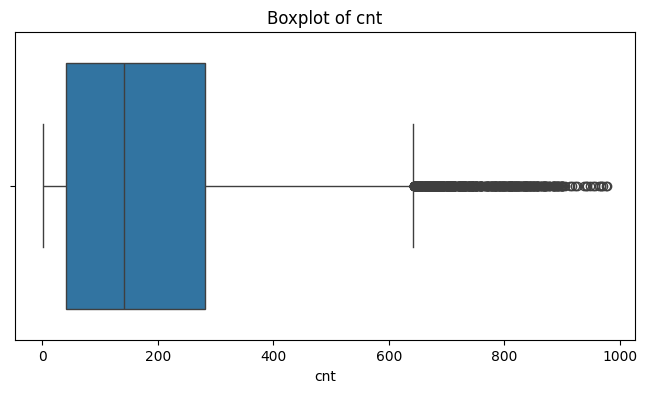

Z-score Outlier Count per Feature:
{'temp': np.int64(0), 'atemp': np.int64(1), 'hum': np.int64(22), 'windspeed': np.int64(107), 'cnt': np.int64(244)}
Isolation Forest: Anomaly value counts
anomaly_iso
 1    17205
-1      174
Name: count, dtype: int64


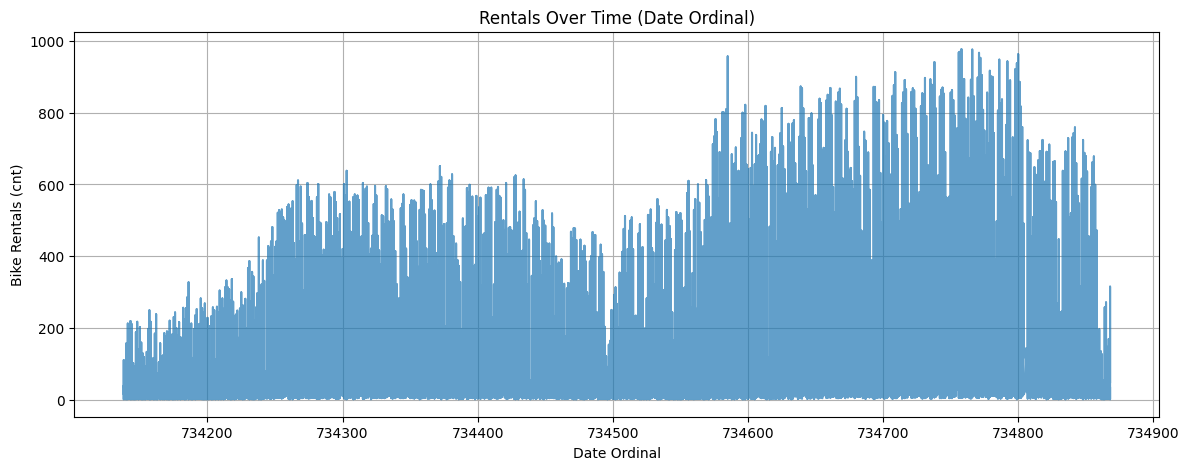

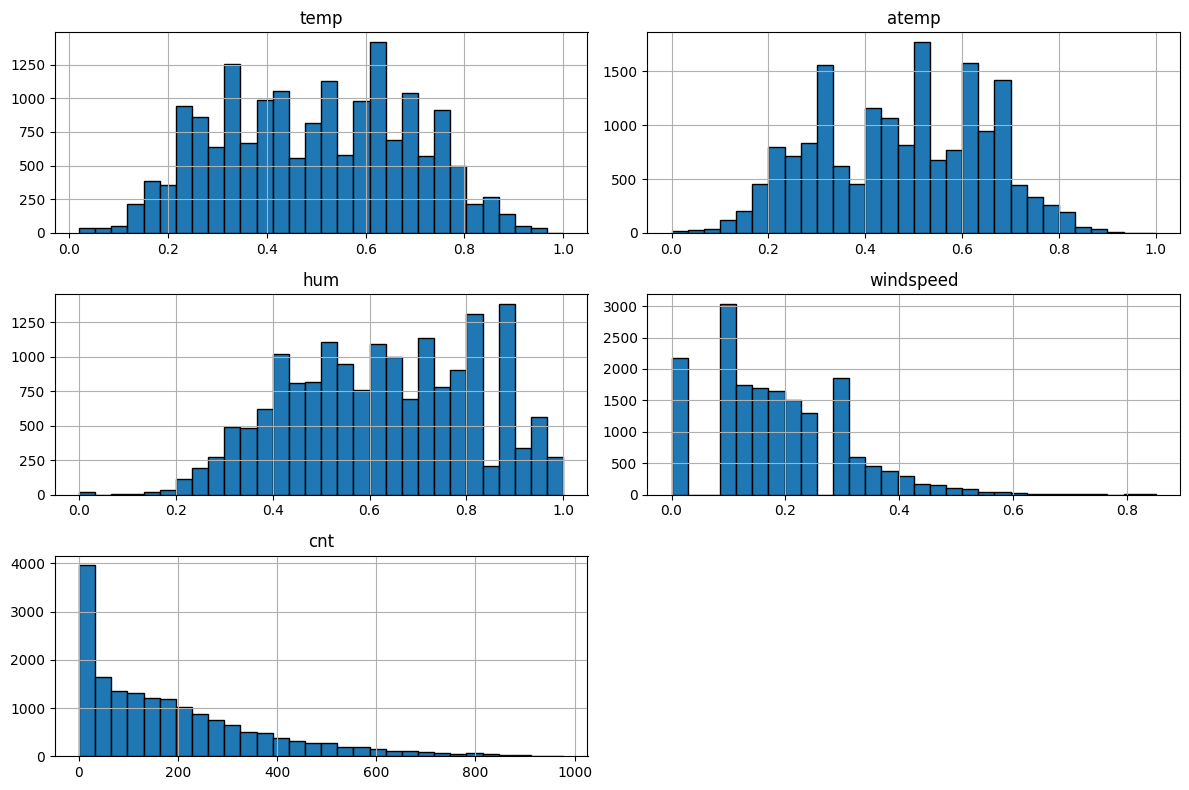

In [31]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

features_to_check = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for col in features_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

z_scores = np.abs(zscore(data[features_to_check]))
outlier_mask = (z_scores > 3)
outlier_counts = np.sum(outlier_mask, axis=0)
print("Z-score Outlier Count per Feature:")
print(dict(zip(features_to_check, outlier_counts)))

iso = IsolationForest(contamination=0.01, random_state=42)
data['anomaly_iso'] = iso.fit_predict(data[features_to_check])
print("Isolation Forest: Anomaly value counts")
print(data['anomaly_iso'].value_counts())

plt.figure(figsize=(14, 5))
plt.plot(data['date_ordinal'], data['cnt'], alpha=0.7)
plt.title("Rentals Over Time (Date Ordinal)")
plt.xlabel("Date Ordinal")
plt.ylabel("Bike Rentals (cnt)")
plt.grid(True)
plt.show()

data[features_to_check].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

data.drop(columns=['anomaly_iso'], inplace=True)

During our exploration of suspicious patterns and anomalies in the dataset, we used visual tools like boxplots and histograms, statistical methods like Z-scores, and machine learning techniques such as Isolation Forest to identify potential outliers. Notably, features like cnt, windspeed, and hum showed signs of skewness and extreme values, with cnt displaying a strong right-skew and several high-value observations. Isolation Forest further confirmed the presence of a small subset of anomalous points. However, after careful consideration, we decided to retain these outliers for now. This decision was based on the relatively small proportion of anomalies in a large dataset, the possibility that these extreme values represent genuine demand spikes rather than data errors, and the robustness of many machine learning models to such variations. We plan to revisit this choice by evaluating model performance with and without outliers later in the pipeline to ensure the most accurate and generalizable results.

## **Task 2: Data Splitting**

In [32]:
total_rows = len(data)

# Calculate split indices
train_end = int(total_rows * 0.70)
val_end = int(total_rows * 0.85)

# Perform the splits
train = data.iloc[:train_end]
val = data.iloc[train_end:val_end]
test = data.iloc[val_end:]

# Check the result
print(f"Train set: {train.shape}")
print(f"Validation set: {val.shape}")
print(f"Test set: {test.shape}")

Train set: (12165, 16)
Validation set: (2607, 16)
Test set: (2607, 16)


In this project, a time-based split strategy was applied to divide the dataset into 70% training, 15% validation, and 15% testing. This method is particularly well-suited for time series data, where preserving the temporal order is crucial. Unlike random splitting, which risks introducing data leakage by mixing past and future information, the time-based split ensures that the model learns only from past data and is tested on future data—reflecting a realistic forecasting scenario. The chosen 70/15/15 proportion provides a balanced distribution: a sufficiently large training set for the model to capture trends and seasonality, a validation set for tuning hyperparameters, and a test set for final unbiased evaluation.

The strength of this approach lies in its ability to maintain the natural flow of time, which is essential for modeling real-world sequences like hourly bike rentals. However, a limitation is that the model may be exposed to only one full annual cycle during training, which could affect its ability to generalize to unseen seasonal behaviors in later periods. Still, this constraint is outweighed by the benefit of preventing temporal leakage. Compared to random splitting, which would distribute similar seasonal signals across all sets, the time-based method better respects the structure of the data and is more appropriate for making forward-looking predictions. This approach ensures a fair, temporal-aware model evaluation aligned with the nature of the problem.

The decision to use 70/15/15 instead of alternatives like 60/20/20 was guided by the need to maximize the training window without significantly reducing the evaluation power of the validation and test sets. Since the dataset spans only two years, allocating 70% to training ensures the model sees a broader range of temporal patterns, such as weekday effects and seasonal fluctuations. At the same time, 15% for validation and test each is enough to capture a diverse set of future observations for tuning and assessing model performance. Although a 60/20/20 split would slightly increase evaluation granularity, it would leave less historical data for the model to learn from, which could reduce forecasting accuracy. Thus, 70/15/15 offers a more optimal balance between learning and evaluation for this type of temporal data.


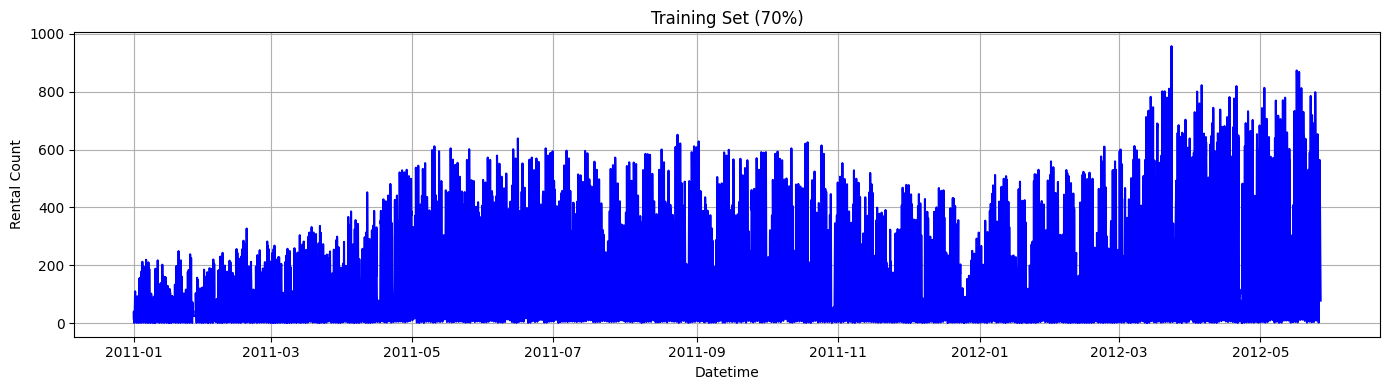

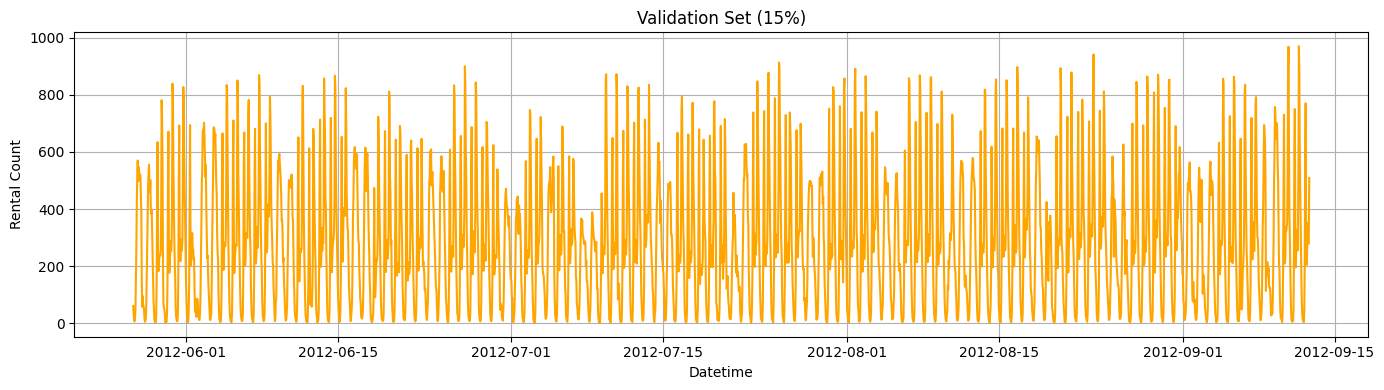

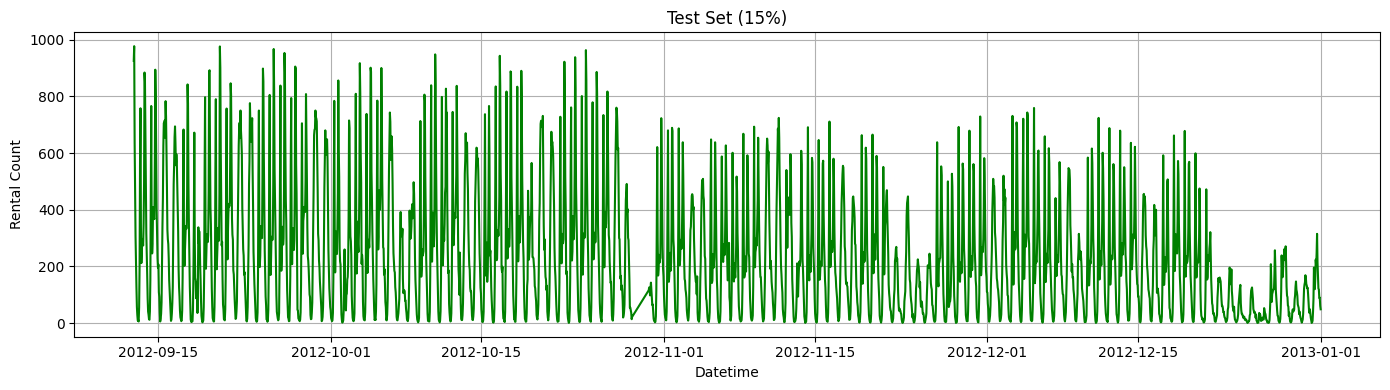

In [33]:
plt.figure(figsize=(14, 4))
plt.plot(train['datetime'], train['cnt'], color='blue')
plt.title('Training Set (70%)')
plt.xlabel('Datetime')
plt.ylabel('Rental Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Validation Set
plt.figure(figsize=(14, 4))
plt.plot(val['datetime'], val['cnt'], color='orange')
plt.title('Validation Set (15%)')
plt.xlabel('Datetime')
plt.ylabel('Rental Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Test Set
plt.figure(figsize=(14, 4))
plt.plot(test['datetime'], test['cnt'], color='green')
plt.title('Test Set (15%)')
plt.xlabel('Datetime')
plt.ylabel('Rental Count')
plt.grid(True)
plt.tight_layout()
plt.show()

These three visualizations represent the time-based 70/15/15 split of the dataset into training, validation, and test sets. The training set graph shows a steady upward trend in bike rentals from January 2011 through May 2012, capturing both seasonal and yearly growth patterns, which are crucial for model learning. The consistency and volume in this segment allow the model to learn a variety of patterns, including the effects of temperature, holidays, and other time-related features.

The validation and test set plots show more rapid, regular fluctuations, especially due to the finer daily or even hourly changes in rental activity. The validation set spans the summer months (June to mid-September 2012), which helps assess the model’s performance during high-demand periods. The test set follows from mid-September through the end of December 2012, capturing the transition from fall to winter—a critical test of how well the model generalizes across seasonal shifts. The clear temporal boundaries in these plots visually confirm the integrity of the split, maintaining chronological order while ensuring each set captures different, non-overlapping seasonal segments for a more realistic evaluation.

In [34]:
data = data.drop(columns=['datetime'])
train = train.drop(columns=['datetime'])
val = val.drop(columns=['datetime'])
test = test.drop(columns=['datetime'])

The temporary datetime column, created by combining dteday and hr, was used for visualizations and chronological splitting, but dropped before modeling since machine learning algorithms cannot interpret datetime objects directly.

## **Task 3: Feature Engineering**

In [35]:
data

season  yr  mnth  hr holiday  weekday workingday  weathersit  temp  \
0           1   0     1   0      No        6         No           1  0.24   
1           1   0     1   1      No        6         No           1  0.22   
2           1   0     1   2      No        6         No           1  0.22   
3           1   0     1   3      No        6         No           1  0.24   
4           1   0     1   4      No        6         No           1  0.24   
...       ...  ..   ...  ..     ...      ...        ...         ...   ...   
17374       1   1    12  19      No        1        Yes           2  0.26   
17375       1   1    12  20      No        1        Yes           2  0.26   
17376       1   1    12  21      No        1        Yes           1  0.26   
17377       1   1    12  22      No        1        Yes           1  0.26   
17378       1   1    12  23      No        1        Yes           1  0.26   

        atemp   hum  windspeed  cnt  day_of_year  date_ordinal  
0      0.2879  0.81     0.0000   16            1        734138  
1      0.2727  0.80     0.0000   40            1        734138  
2      0.2727  0.80     0.0000   32            1        734138  
3      0.2879  0.75     0.0000   13            1        734138  
4      0.2879  0.75     0.0000    1            1        734138  
...       ...   ...        ...  ...          ...           ...  
17374  0.2576  0.60     0.1642  119          366        734868  
17375  0.2576  0.60     0.1642   89          366        734868  
17376  0.2576  0.60     0.1642   90          366        734868  
17377  0.2727  0.56     0.1343   61          366        734868  
17378  0.2727  0.65     0.1343   49          366        734868  

[17379 rows x 15 columns]

### **Cosine Encoding**

1.	No Fitting Step Required:
Cyclical features like hour, weekday, and month repeat in a loop. To preserve this natural cycle in the data, sine and cosine transformations are applied. Unlike scaling or encoding techniques that require fitting to the training set, cyclical encoding is purely mathematical and deterministic. The same transformation applies to any dataset, so whether you apply it before or after splitting makes no difference to the values — although applying it post-split is often cleaner for pipeline structure.
2.	Visualization:
When plotted on a 2D plane using their sine and cosine components, these features form a circular pattern. For example, hour 0 and hour 23 appear right next to each other on the circle, even though numerically they seem far apart. This confirms that cyclical relationships are preserved and learned more naturally by models.
3.	Benefits:

	• Smooth transitions – Models can recognize continuity around the feature’s endpoints (like 23 → 0 or Dec → Jan).

	• Compact representation – Each cyclical feature uses only two columns, avoiding the high dimensionality of one-hot encoding.

	• Leakage-free and consistent – No training-specific fitting required, and the transformation can be reused reliably across train, validation, and test sets.

Cyclical encoding is especially effective for time-based features like hr, weekday, mnth, and day_of_year. It benefits models that are sensitive to continuous input (like linear regression or neural networks), while still being compact and expressive for boosting methods. Tree-based models may still perform well with one-hot encoded versions, but they won’t capture cyclic continuity without this transformation.

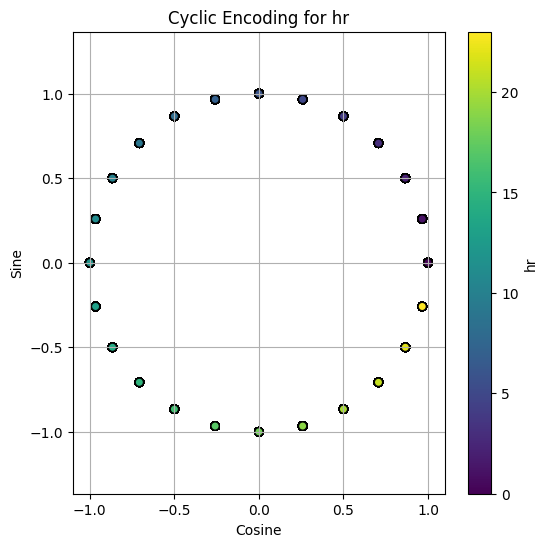

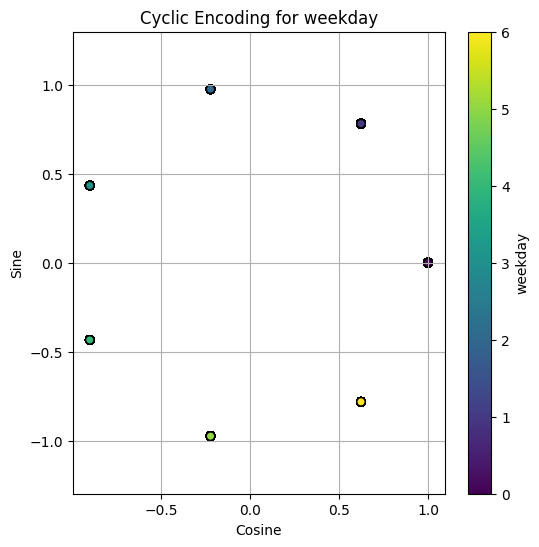

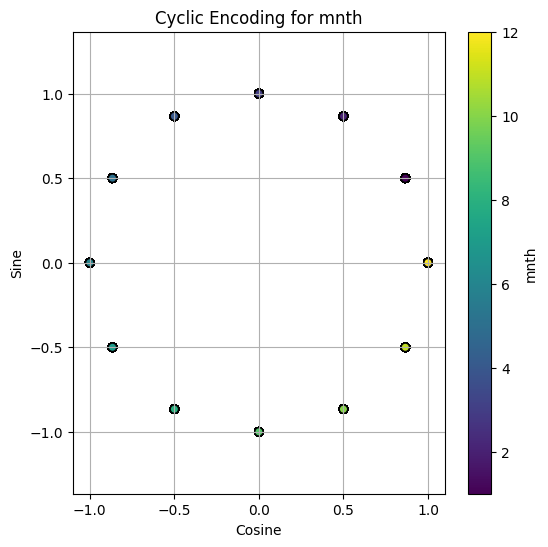

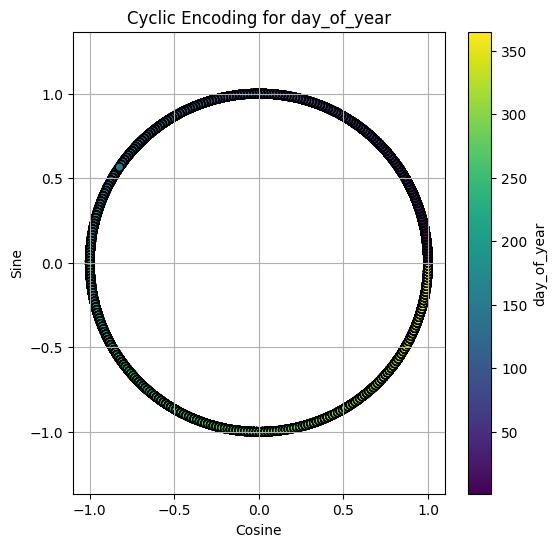

In [36]:
def add_days_in_year(df):
    df['days_in_year'] = np.where(df['yr'] == 1, 366, 365)
    return df

train = add_days_in_year(train)
val = add_days_in_year(val)
test = add_days_in_year(test)

def add_cyclic_features(df, col_name, max_val_col=None):
    if max_val_col: 
        df[f'{col_name}_sin'] = np.sin(2 * np.pi * df[col_name] / df[max_val_col])
        df[f'{col_name}_cos'] = np.cos(2 * np.pi * df[col_name] / df[max_val_col])
    else:  # fixed max value
        max_val = {
            'hr': 24,
            'weekday': 7,
            'mnth': 12
        }[col_name]
        df[f'{col_name}_sin'] = np.sin(2 * np.pi * df[col_name] / max_val)
        df[f'{col_name}_cos'] = np.cos(2 * np.pi * df[col_name] / max_val)
    return df

for split in [train, val, test]:
    for col in ['hr', 'weekday', 'mnth']:
        split = add_cyclic_features(split, col)
    split = add_cyclic_features(split, 'day_of_year', max_val_col='days_in_year')

def plot_cyclic_features(df, col_name):
    plt.figure(figsize=(6, 6))
    scatter = plt.scatter(
        df[f'{col_name}_cos'], df[f'{col_name}_sin'],
        c=df[col_name], cmap='viridis', edgecolors='k'
    )
    plt.xlabel("Cosine")
    plt.ylabel("Sine")
    plt.title(f"Cyclic Encoding for {col_name}")
    plt.grid(True)
    plt.axis('equal')
    plt.colorbar(scatter, label=f"{col_name}")
    plt.show()

for col in ['hr', 'weekday', 'mnth', 'day_of_year']:
    plot_cyclic_features(train, col)

train = train.drop(columns=['day_of_year', 'days_in_year', 'hr', 'weekday', 'mnth'])
val = val.drop(columns=['day_of_year', 'days_in_year', 'hr', 'weekday', 'mnth'])
test = test.drop(columns=['day_of_year', 'days_in_year', 'hr', 'weekday', 'mnth'])


The encoding of cyclical features such as hr, weekday, mnth, and day_of_year is essential for accurately modeling periodic patterns within the dataset. Starting with the hour of the day (hr), which ranges from 0 to 23, sine and cosine transformations were applied to map these values onto a unit circle. This preserves the continuity between hour 23 and hour 0, which would otherwise appear unrelated using standard encoding methods. The resulting plot shows a smooth and complete circle, confirming that each hour is equally spaced and transitions smoothly around the clock—an ideal structure for temporal features like time of day.

The weekday feature, spanning from 0 (Sunday) to 6 (Saturday), was also encoded cyclically. Weekdays are naturally periodic, as Monday follows Sunday in a continuous weekly cycle. One-hot encoding, while common, fails to capture this loop, introducing artificial discontinuities. The sine and cosine transformations, however, place each day at a unique position on a circle, preserving the cyclical relationship. The corresponding visualization reflects this, with evenly spaced points indicating proper encoding of the weekly cycle.

Similarly, month (mnth) values from 1 to 12 benefit from cyclic encoding. Since months represent seasonal cycles, using sine and cosine mappings helps maintain the relationship between December and January, which traditional encoding breaks. The plotted circle of 12 points provides a clear illustration of how each month fits into the annual cycle, supporting better seasonality learning in models, especially those dealing with long-term trends.

Lastly, day of the year (day_of_year) captures even finer seasonal variation across 365 (or 366) days. The transformation into sine and cosine ensures that Dec 31 and Jan 1 remain close in encoded space, maintaining the yearly continuity. While leap years introduce a small complication, encoding all values over 366 days provides consistency. The full circular visualization for day of year highlights how well this method preserves the cyclical progression of time, making it particularly useful for identifying annual trends.

Overall, cyclic encoding ensures that the model understands proximity between endpoints in a cycle—something neither label encoding nor one-hot encoding can offer. The visualizations confirm the effectiveness of this approach, with each graph showing a smooth, closed circular distribution. These transformations, therefore, are not only mathematically appropriate but visually and intuitively reinforce the model’s ability to learn temporal cycles. Although this encoding can be applied before or after data splitting with the same outcome, it was performed after the split in this case to maintain a purist and modular pipeline structure. This mirrors standard preprocessing practices, where transformations are applied within the training workflow, reinforcing good habits even for deterministic methods.

### **One-Hot Encoding**

1.	Fitting Required:
One-hot encoding is designed for categorical variables where the categories have no inherent order. Each unique category becomes its own binary column, indicating whether a sample belongs to that category. Because categories can differ between splits, one-hot encoders must be fit on the training set only and then applied consistently to the validation and test sets to avoid introducing unseen categories or data leakage.
2.	Visualization:
One-hot encoding is not visual in nature. Instead, it expands a single column into multiple binary features — one per category. For example, season with four values becomes four columns, each showing presence (1) or absence (0). This makes it easy for models to assign different importance to each category, and for humans to interpret.
3.	Benefits:

    • Clear and interpretable – Each column represents a distinct, easily understood category.

    • Ideal for tree-based models – Decision trees and ensembles like random forest and gradient boosting handle binary features very efficiently.

    • No false assumptions – It avoids implying any order or continuity between values that aren’t actually ordered.

One-hot encoding is the best choice for features like season, weathersit, holiday, and workingday, where the values are nominal and not related in a cyclical or ordinal way. It’s not suitable for features like hour or month where proximity matters — in those cases, cyclical encoding is the better option.

Train shape: (12165, 23)
Validation shape: (2607, 23)
Test shape: (2607, 23)


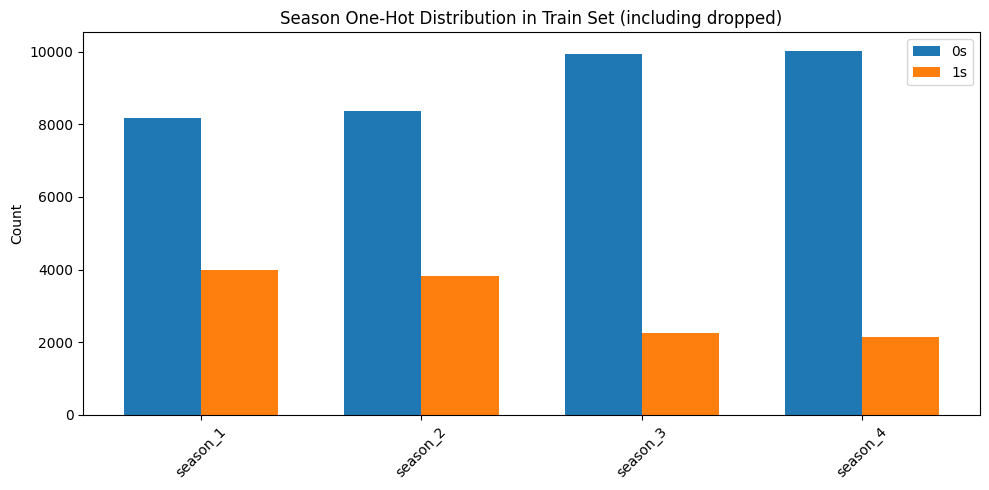

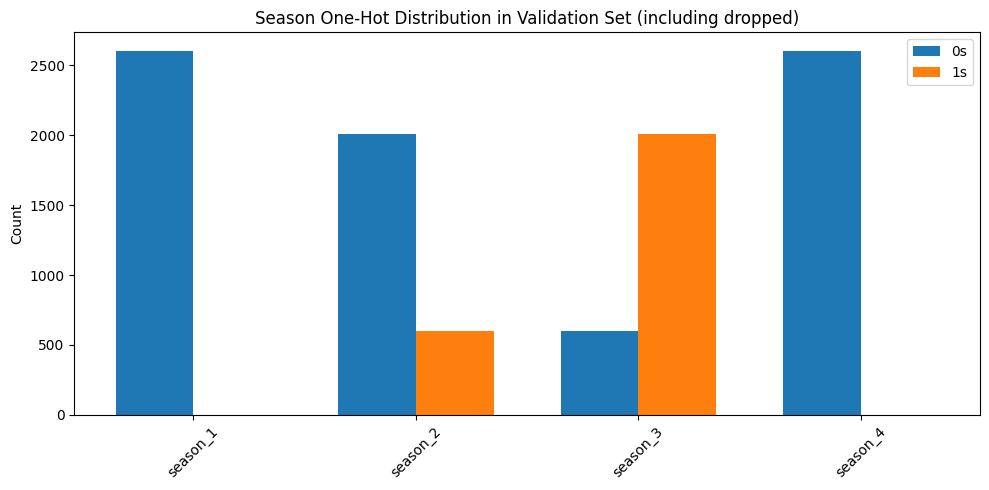

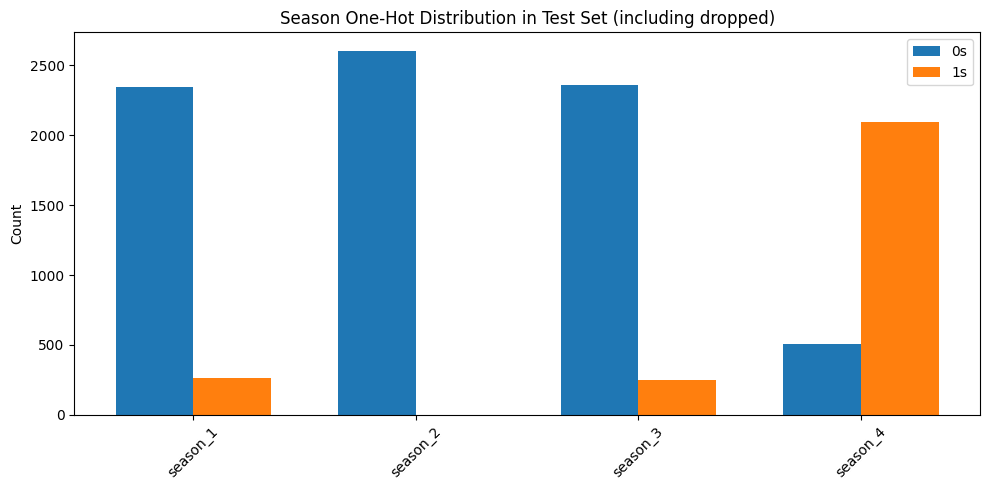

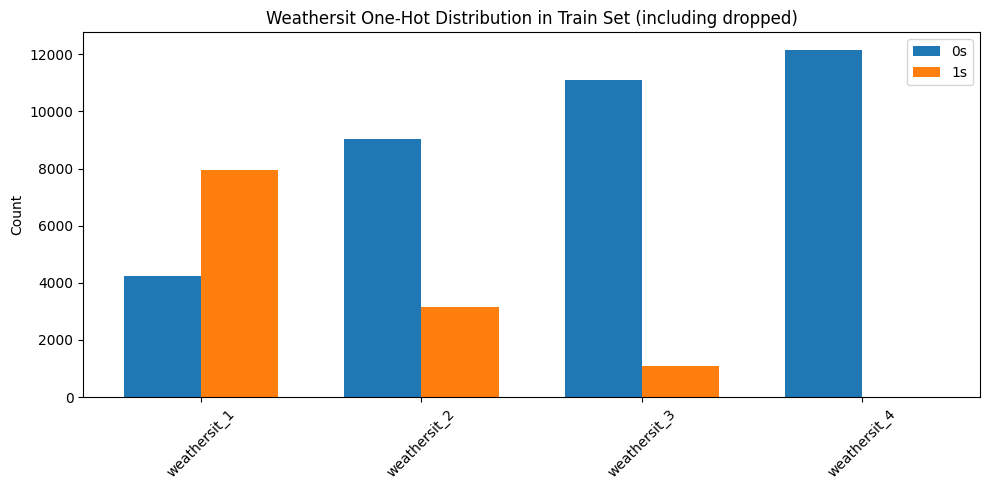

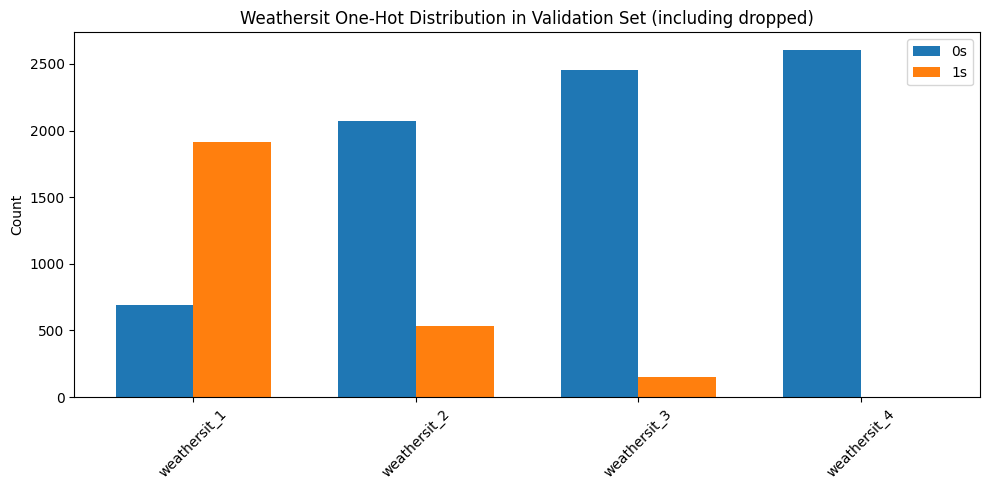

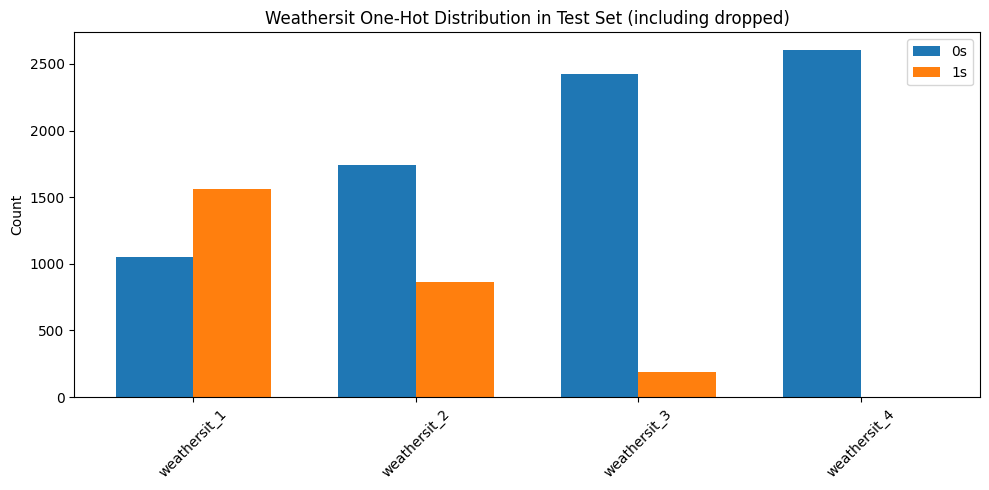

In [37]:
multi_cat_cols = ['season', 'weathersit', 'holiday', 'workingday']

encoder = OneHotEncoder(drop='first', sparse_output=False)

train_encoded = encoder.fit_transform(train[multi_cat_cols])
train_encoded = pd.DataFrame(train_encoded,
                             columns=encoder.get_feature_names_out(multi_cat_cols),
                             index=train.index)

val_encoded = encoder.transform(val[multi_cat_cols])
val_encoded = pd.DataFrame(val_encoded,
                           columns=encoder.get_feature_names_out(multi_cat_cols),
                           index=val.index)

test_encoded = encoder.transform(test[multi_cat_cols])
test_encoded = pd.DataFrame(test_encoded,
                            columns=encoder.get_feature_names_out(multi_cat_cols),
                            index=test.index)

train_final = pd.concat([train.drop(columns=multi_cat_cols), train_encoded], axis=1)
val_final = pd.concat([val.drop(columns=multi_cat_cols), val_encoded], axis=1)
test_final = pd.concat([test.drop(columns=multi_cat_cols), test_encoded], axis=1)

train = train_final
val = val_final
test = test_final

print("Train shape:", train_final.shape)
print("Validation shape:", val_final.shape)
print("Test shape:", test_final.shape)

encoded_features = ['season', 'weathersit']

def add_dropped_category(df, prefix):
    cols = [col for col in df.columns if col.startswith(prefix + '_')]
    first_col = f'{prefix}_1'
    df[first_col] = (df[cols] == 0).all(axis=1).astype(int)
    return [first_col] + cols

season_cols = add_dropped_category(train, 'season')
weathersit_cols = add_dropped_category(train, 'weathersit')

for df in [val, test]:
    df['season_1'] = (df[[col for col in df.columns if col.startswith('season_')]] == 0).all(axis=1).astype(int)
    df['weathersit_1'] = (df[[col for col in df.columns if col.startswith('weathersit_')]] == 0).all(axis=1).astype(int)

def plot_onehot_distribution_with_first(df, feature_cols, feature_name, set_name):
    zero_counts = (df[feature_cols] == 0).sum()
    one_counts = (df[feature_cols] == 1).sum()

    x = range(len(feature_cols))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar([i - width/2 for i in x], zero_counts, width=width, label='0s')
    plt.bar([i + width/2 for i in x], one_counts, width=width, label='1s')

    plt.xticks(ticks=x, labels=feature_cols, rotation=45)
    plt.ylabel("Count")
    plt.title(f"{feature_name.capitalize()} One-Hot Distribution in {set_name} Set (including dropped)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Season
plot_onehot_distribution_with_first(train, season_cols, "season", "Train")
plot_onehot_distribution_with_first(val, season_cols, "season", "Validation")
plot_onehot_distribution_with_first(test, season_cols, "season", "Test")

# Weathersit
plot_onehot_distribution_with_first(train, weathersit_cols, "weathersit", "Train")
plot_onehot_distribution_with_first(val, weathersit_cols, "weathersit", "Validation")
plot_onehot_distribution_with_first(test, weathersit_cols, "weathersit", "Test")

train = train.drop(columns=['weathersit_1', 'season_1'])
test = test.drop(columns=['weathersit_1', 'season_1'])
val = val.drop(columns=['weathersit_1', 'season_1'])

In this dataset, one-hot encoding was applied to the categorical variables season and weathersit. These features are nominal—meaning they do not follow a natural order—so one-hot encoding is the most suitable method to ensure that the model treats each category independently. This method transforms each unique value into a binary feature, where 1 denotes presence and 0 denotes absence, preventing the model from inferring false ordinal relationships.

To avoid multicollinearity, the drop='first' parameter was used during encoding. This drops the first category, allowing the remaining categories to be interpreted relative to the dropped one. For example, if season_1 (Winter) is dropped, then season_2 = 1 means it’s Spring, and season_2 = 0 implies it could be Winter or another season depending on other values.

However, mnth (month) was not one-hot encoded. Instead, it was treated as a cyclic feature and encoded using sine and cosine transformations. The key reason for this choice is the periodic nature of months: December (12) and January (1) are adjacent in time, but one-hot encoding would place them at opposite ends of the feature space, breaking this continuity. In contrast, cyclic encoding preserves the temporal closeness of such values by projecting them onto a circular coordinate system. This allows models, especially linear or neural networks, to learn smooth seasonal patterns without abrupt boundaries in feature space.

To prevent data leakage, the one-hot encoder was fit only on the training set and applied consistently to the validation and test sets using the same structure. This ensures the model doesn’t see unseen categories during training and remains fair and generalizable when making predictions.

In summary, the choice of encoding methods—one-hot for nominal features (season, weathersit) and cyclic for periodic features (mnth)—was made based on the nature of each variable. This maximizes model interpretability and effectiveness while maintaining robust generalization.

**Fix**

The plots visualize the distribution of one-hot encoded values (0s and 1s) for each class of the season and weathersit features across the training, validation, and test sets. Although drop='first' was used during encoding, the visualizations manually add the dropped category back to maintain interpretability and ensure no class imbalance is overlooked.

Each bar group represents a category (e.g., season_2 for Spring), showing how many rows have a 1 (category present) or 0 (category absent). The inclusion of season_1 and weathersit_1 in the graphs (even though dropped during encoding) helps verify that all categories are well-represented across splits and avoids silent bias where a class might dominate one subset of the data.

These visualizations confirm that the class distribution remains consistent across splits, which is crucial for fair model evaluation. Disproportionate presence or absence of categories in any subset could skew results or reduce model performance on underrepresented classes. Thus, these plots validate the effectiveness and fairness of the one-hot encoding and data splitting strategy.

### **Standardization**

1.	Fitting Step Required:
Unlike cyclical encoding, standardization involves learning from the data. The StandardScaler computes the mean and standard deviation of each feature using the training set only, and then applies the transformation to the training, validation, and test sets. This avoids data leakage while ensuring consistency. The process ensures each scaled feature has a mean of 0 and standard deviation of 1, which is especially important for algorithms sensitive to feature magnitude.
2.	Visualization:
Histograms of the raw features typically show skew or scale differences. After standardization, the transformed distributions are centered around 0, though their shape (e.g., skewness) remains unchanged. This makes it easier to compare feature importance and ensures that no single feature dominates the learning process due to scale alone.
3.	Benefits:

    • Equal influence – Features like windspeed and temperature can have different units and magnitudes; scaling ensures they contribute equally.

    • Faster convergence – Algorithms like gradient descent benefit from standardized input, improving model training efficiency.

    • Model compatibility – Essential for distance-based models (e.g., KNN, SVM), regularized regression (e.g., Ridge, Lasso), and neural networks.

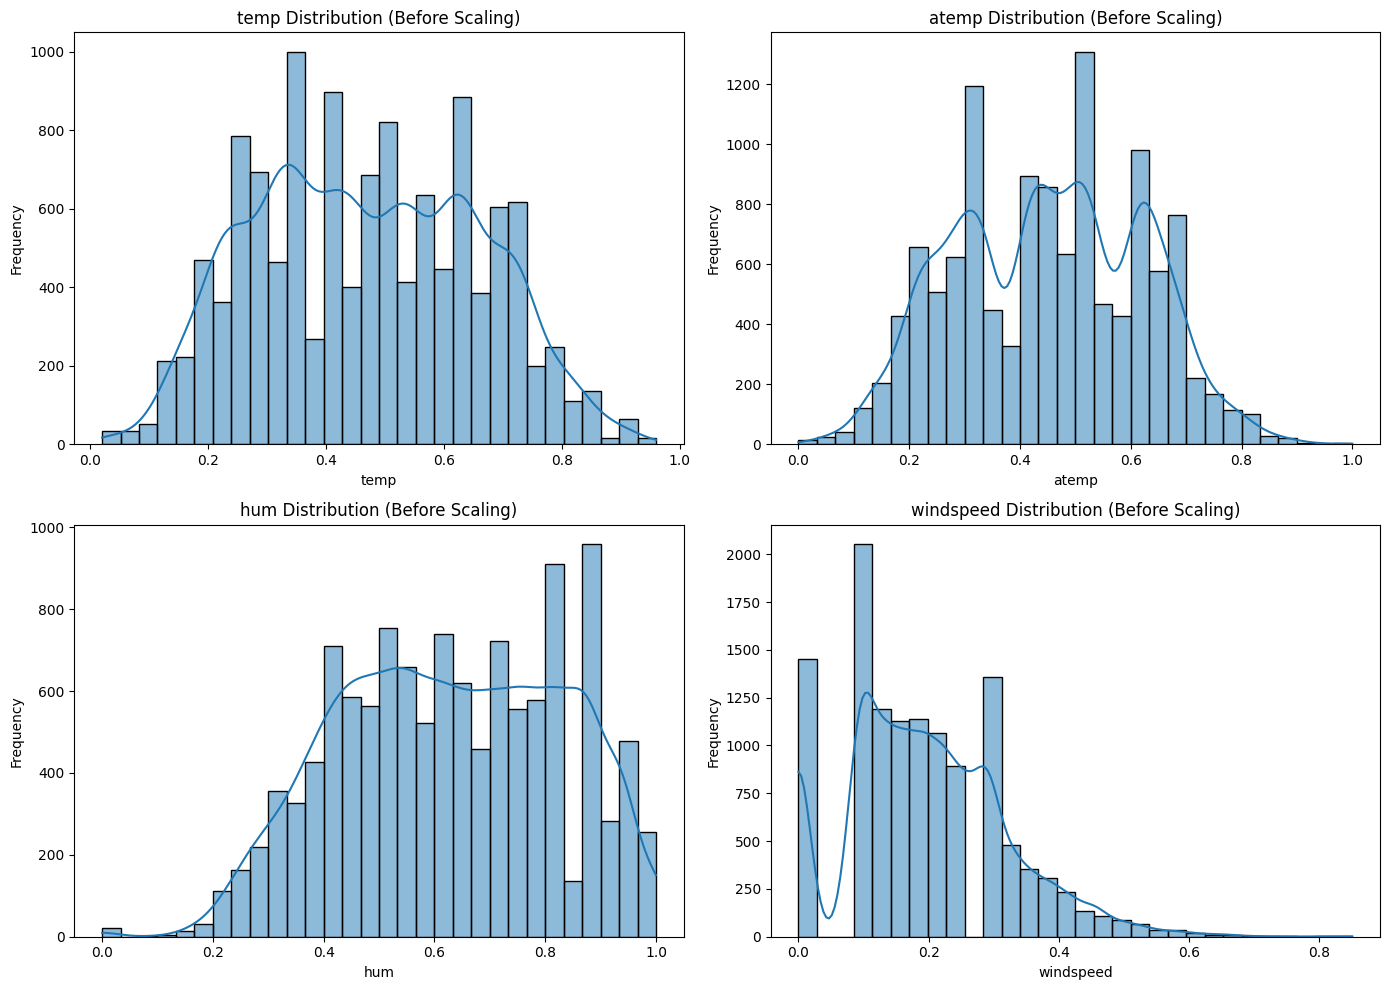

In [38]:
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

def plot_feature_distributions(df, features, title_suffix="Before Scaling"):
    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'{feature} Distribution ({title_suffix})')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_feature_distributions(train, continuous_features)

Although the continuous features (temp, atemp, hum, and windspeed) in the dataset appear to fall within narrow numeric ranges, further investigation reveals that they are already normalized. For instance, temp and atemp have been scaled from their original Celsius values, and hum and windspeed have been divided by constants (100 and 67 respectively). Given this preprocessing, it would not make sense to unnormalize these values only to reapply standardization, as this would introduce unnecessary complexity without adding meaningful benefit. The current normalized form is sufficient for most machine learning models, especially tree-based and ensemble methods, which do not require strictly standardized input. Additional scaling may only be considered for algorithms sensitive to input magnitude—such as linear regression or neural networks—and even then, the normalized features are typically adequate.

### **Interaction Consideration and Features Removal**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import shap
import matplotlib.pyplot as plt

# Replace with your actual dataset
df = train.copy()
y = df['cnt']
X = df.drop('cnt', axis=1)

# Step 1: Generate interaction + power features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Step 2: Split data
X_train = train.copy()
y_train = 

# Step 3: Train models
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 4: SHAP explainers
explainer_rf = shap.Explainer(rf, X_train)
shap_rf_vals = explainer_rf(X_train)
shap_rf_importance = pd.Series(np.abs(shap_rf_vals.values).mean(axis=0), index=feature_names)

explainer_lr = shap.Explainer(lr, X_train)
shap_lr_vals = explainer_lr(X_train)
shap_lr_importance = pd.Series(np.abs(shap_lr_vals.values).mean(axis=0), index=feature_names)

# Step 5: Mutual Information
mi = mutual_info_regression(X_train, y_train, discrete_features=False)
mi_series = pd.Series(mi, index=feature_names)

# Normalize all scores to 0-1
shap_rf_norm = shap_rf_importance / shap_rf_importance.max()
shap_lr_norm = shap_lr_importance / shap_lr_importance.max()
mi_norm = mi_series / mi_series.max()

# Step 6: Get top N features from each method
N = 25
top_rf = set(shap_rf_norm.sort_values(ascending=False).head(N).index)
top_lr = set(shap_lr_norm.sort_values(ascending=False).head(N).index)
top_mi = set(mi_norm.sort_values(ascending=False).head(N).index)

# Step 7: Match common features across all methods
matched = top_rf & top_lr & top_mi
matched = list(matched)

# Step 8: Plot results
def plot_importance(importances, title):
    importances.loc[matched].sort_values().plot(kind='barh', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Normalized Importance')
    plt.tight_layout()
    plt.show()

plot_importance(shap_rf_norm, 'Matched SHAP Importance (Random Forest)')
plot_importance(shap_lr_norm, 'Matched SHAP Importance (Linear Regression)')
plot_importance(mi_norm, 'Matched Mutual Information')

print("Matched Interaction Terms:")
print(matched)

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

hr_sin*hr_sin_temp            0.431466
temp*temp_windspeed           0.354735
temp*windspeed                0.305067
workingday_Yes                0.023467
workingday_Yes*hr_cos_hum    -0.300617
hum*hr_sin_hum               -0.301876
hr_sin*season_2              -0.305648
hr_cos*hr_cos_hum            -0.307656
windspeed*hr_sin_hum         -0.308099
windspeed*hr_cos_hum         -0.308743
windspeed*hr_cos             -0.315710
hr_sin*workingday_Yes        -0.319007
hr_cos*temp_windspeed        -0.320521
season_2*hr_sin_temp         -0.333833
yr*hr_sin_temp               -0.335179
hr_cos*hum*temp_hum          -0.349661
temp*windspeed*hr_sin_hum    -0.349878
temp*hr_cos_temp             -0.353684
hum*hr_sin                   -0.357515
windspeed*hr_sin             -0.359551
workingday_Yes*hr_sin_temp   -0.361961
hum*hr_cos_hum               -0.363284
hr_cos*temp_hum              -0.379230
hr_cos*temp_hum              -0.379230
hum*hr_cos_temp              -0.379230
hr_sin*temp_hum          

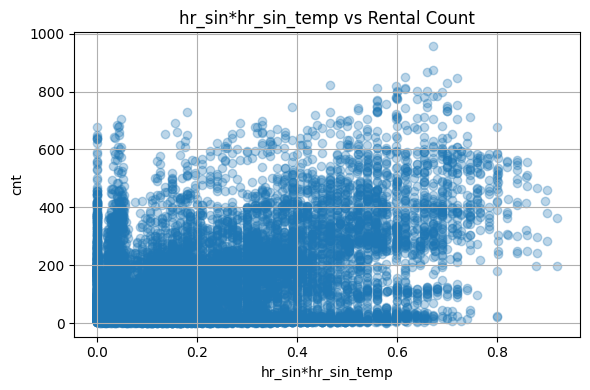

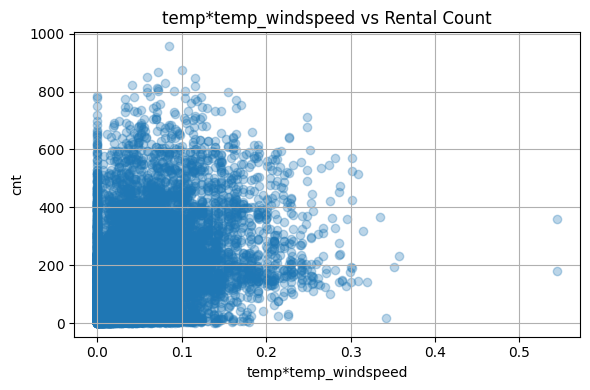

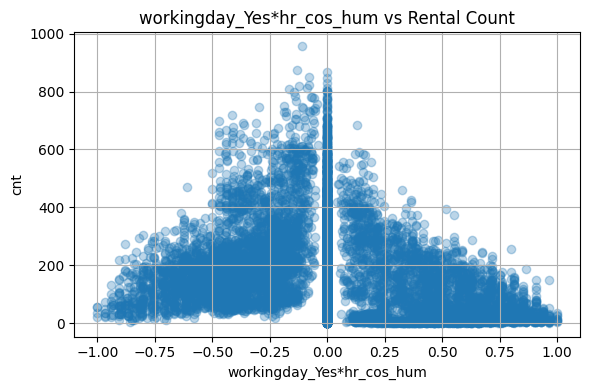

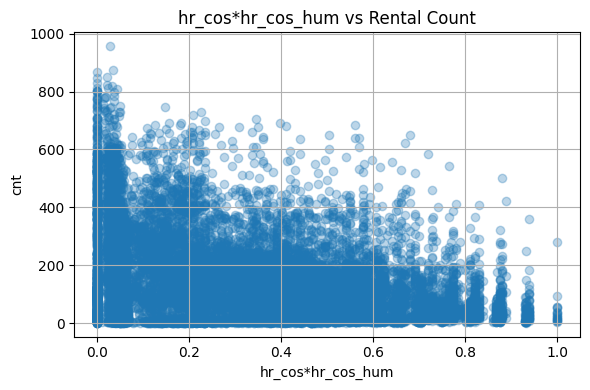

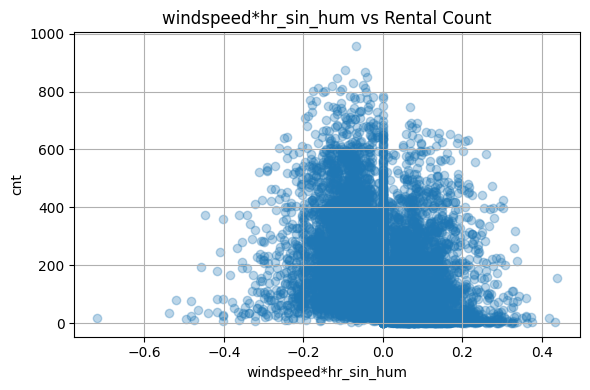

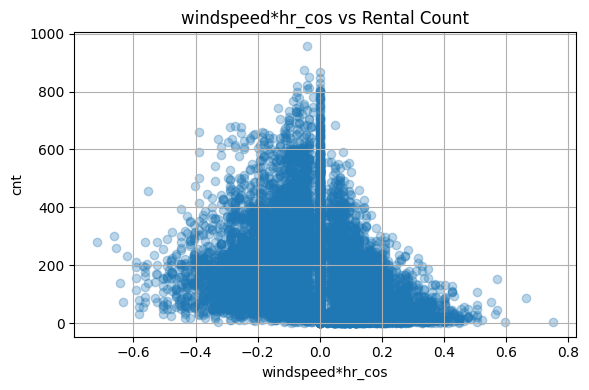

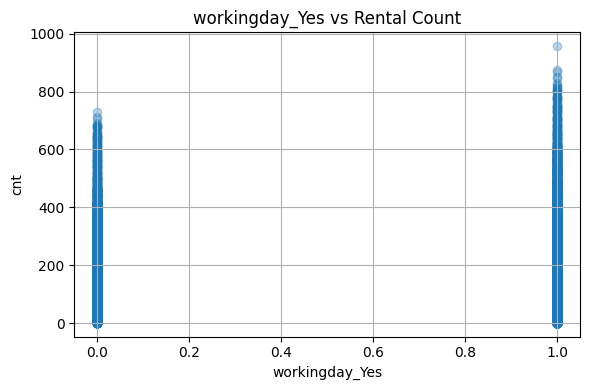

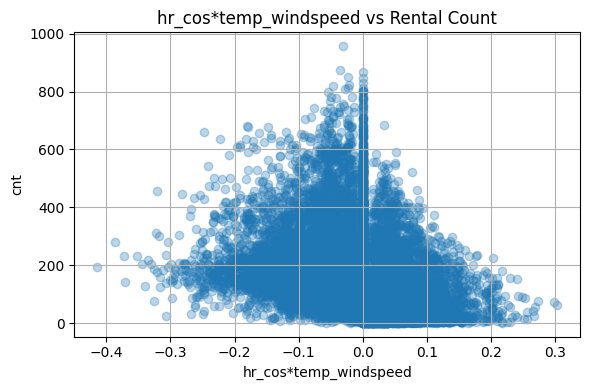

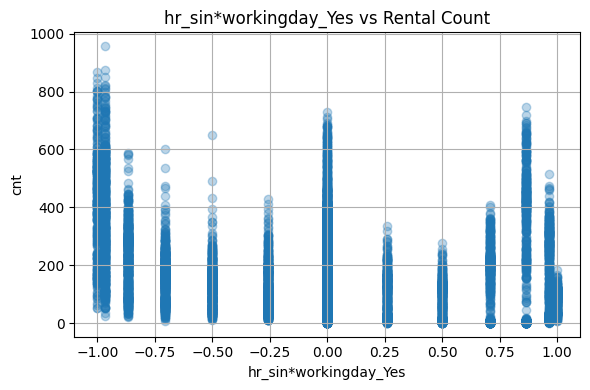

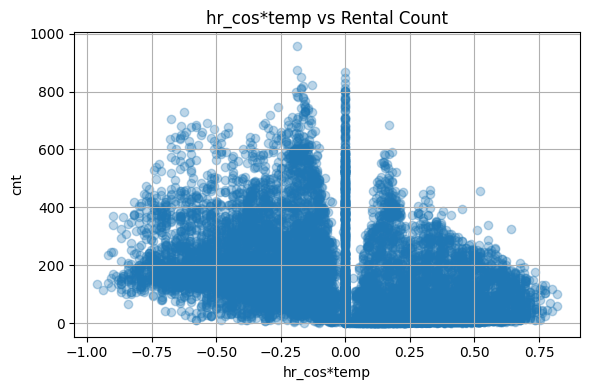

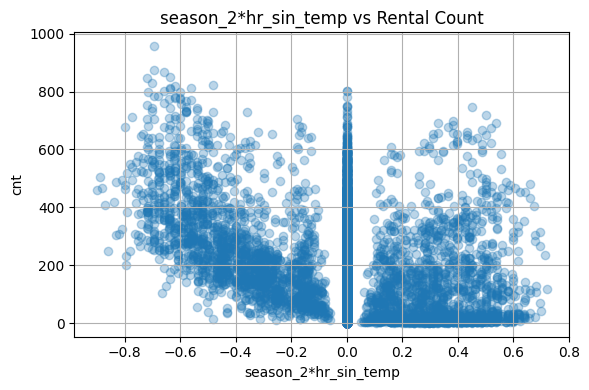

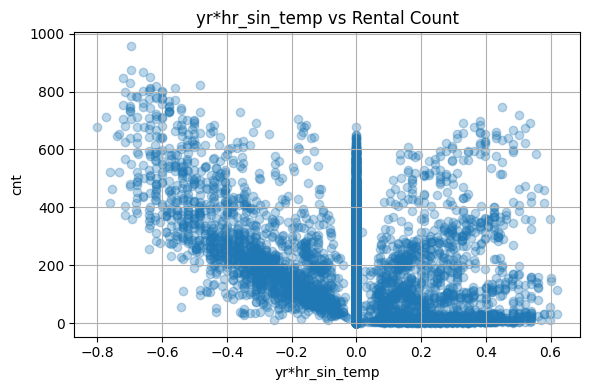

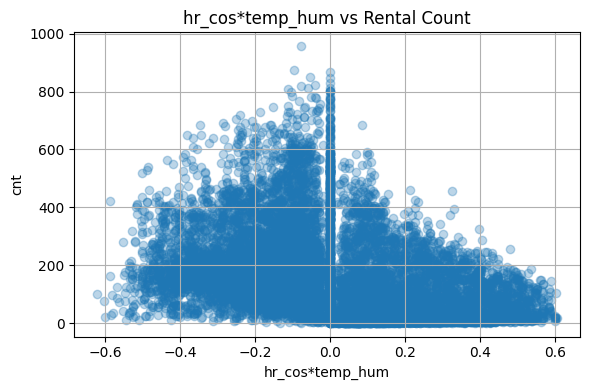

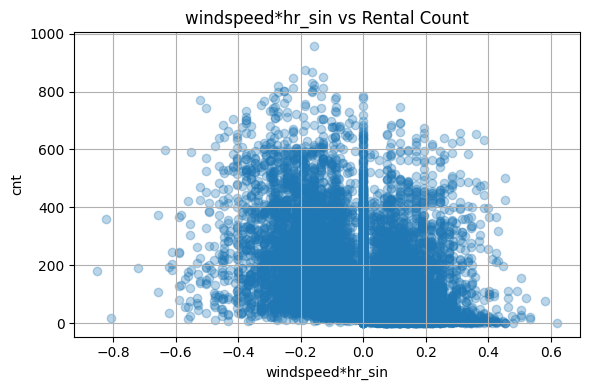

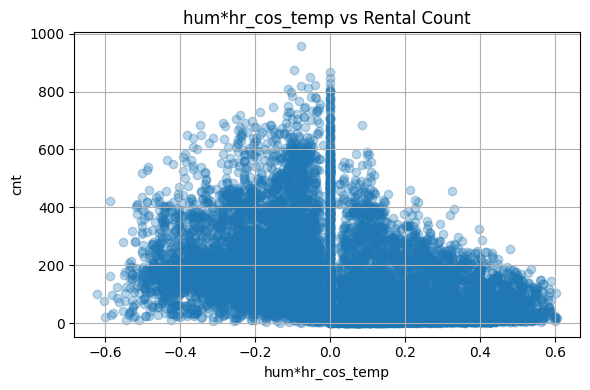

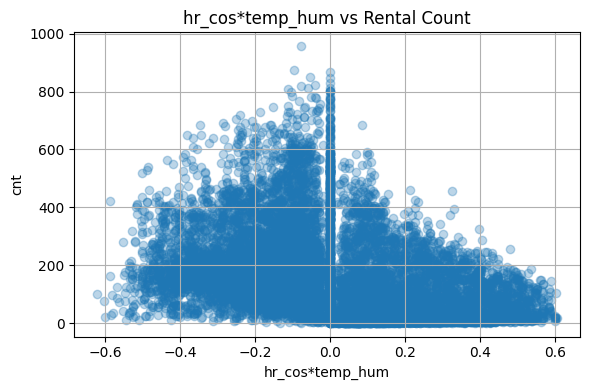

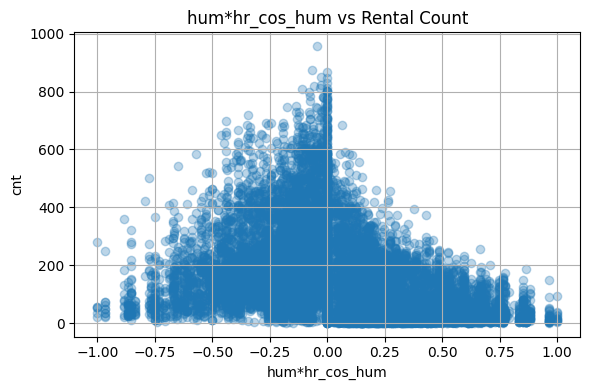

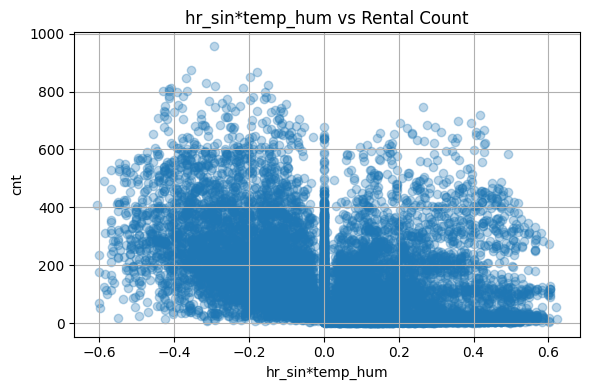

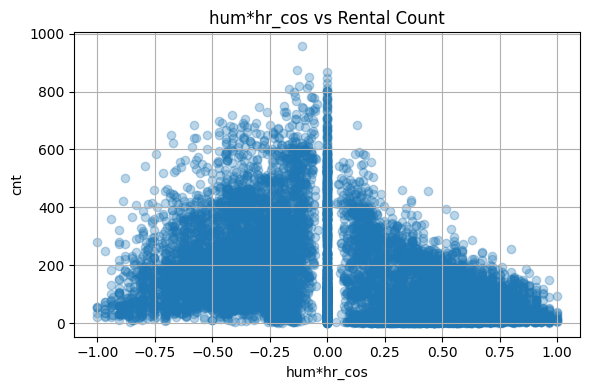

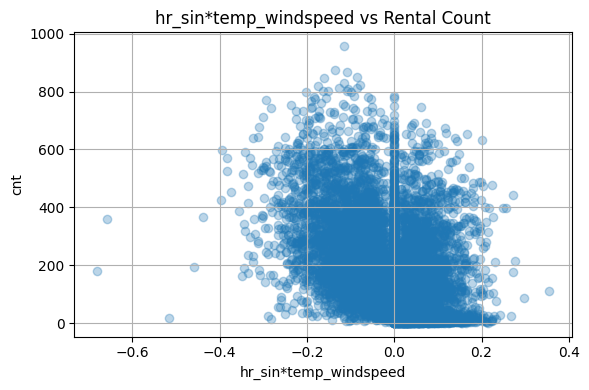

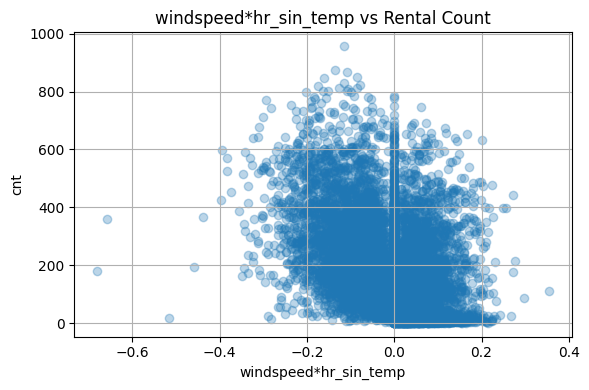

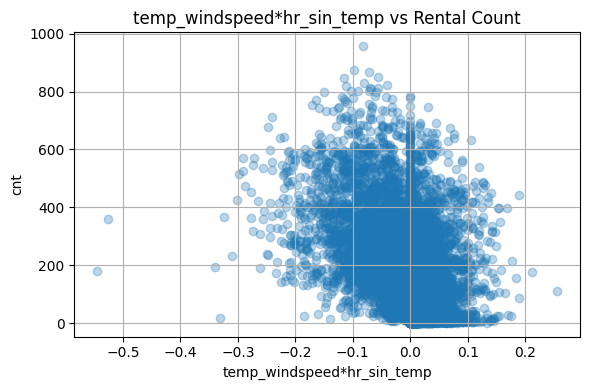

yr  temp   hum  windspeed  cnt        hr_sin        hr_cos  \
12165   1  0.64  0.73     0.2239   61  5.000000e-01  8.660254e-01   
12166   1  0.64  0.73     0.1642   36  7.071068e-01  7.071068e-01   
12167   1  0.62  0.83     0.1940   11  8.660254e-01  5.000000e-01   
12168   1  0.62  0.83     0.1940    7  9.659258e-01  2.588190e-01   
12169   1  0.62  0.83     0.1642   22  1.000000e+00  6.123234e-17   
...    ..   ...   ...        ...  ...           ...           ...   
14767   1  0.68  0.36     0.1343  352  1.224647e-16 -1.000000e+00   
14768   1  0.70  0.34     0.1343  323 -2.588190e-01 -9.659258e-01   
14769   1  0.70  0.37     0.1642  278 -5.000000e-01 -8.660254e-01   
14770   1  0.72  0.37     0.1343  318 -7.071068e-01 -7.071068e-01   
14771   1  0.72  0.37     0.1642  509 -8.660254e-01 -5.000000e-01   

       weekday_sin  weekday_cos  mnth_sin  ...  hum*hr_cos_temp  \
12165     0.000000     1.000000       0.5  ...     4.046071e-01   
12166     0.000000     1.000000       0.5  ...     3.303603e-01   
12167     0.000000     1.000000       0.5  ...     2.573000e-01   
12168     0.000000     1.000000       0.5  ...     1.331883e-01   
12169     0.000000     1.000000       0.5  ...     3.151016e-17   
...            ...          ...       ...  ...              ...   
14767     0.433884    -0.900969      -1.0  ...    -2.448000e-01   
14768     0.433884    -0.900969      -1.0  ...    -2.298903e-01   
14769     0.433884    -0.900969      -1.0  ...    -2.243006e-01   
14770     0.433884    -0.900969      -1.0  ...    -1.883732e-01   
14771     0.433884    -0.900969      -1.0  ...    -1.332000e-01   

       hum*hr_cos_hum  temp*hr_sin_temp  hr_sin*temp_hum   temp*hr_cos  \
12165    4.615049e-01      2.048000e-01     2.336000e-01  5.542563e-01   
12166    3.768172e-01      2.896309e-01     3.303603e-01  4.525483e-01   
12167    3.444500e-01      3.329002e-01     4.456567e-01  3.100000e-01   
12168    1.783004e-01      3.713019e-01     4.970654e-01  1.604678e-01   
12169    4.218296e-17      3.844000e-01     5.146000e-01  3.796405e-17   
...               ...               ...              ...           ...   
14767   -1.296000e-01      5.662767e-17     2.997935e-17 -6.800000e-01   
14768   -1.116610e-01     -1.268213e-01    -6.159893e-02 -6.761481e-01   
14769   -1.185589e-01     -2.450000e-01    -1.295000e-01 -6.062178e-01   
14770   -9.680292e-02     -3.665642e-01    -1.883732e-01 -5.091169e-01   
14771   -6.845000e-02     -4.489476e-01    -2.307092e-01 -3.600000e-01   

         hum*hr_cos  hr_sin*temp_windspeed  windspeed*hr_sin_temp  \
12165  6.321985e-01           7.164800e-02           7.164800e-02   
12166  5.161880e-01           7.430844e-02           7.430844e-02   
12167  4.150000e-01           1.041655e-01           1.041655e-01   
12168  2.148198e-01           1.161816e-01           1.161816e-01   
12169  5.082284e-17           1.018040e-01           1.018040e-01   
...             ...                    ...                    ...   
14767 -3.600000e-01           1.118396e-17           1.118396e-17   
14768 -3.284148e-01          -2.433158e-02          -2.433158e-02   
14769 -3.204294e-01          -5.747000e-02          -5.747000e-02   
14770 -2.616295e-01          -6.837440e-02          -6.837440e-02   
14771 -1.850000e-01          -1.023850e-01          -1.023850e-01   

       temp_windspeed*hr_sin_temp   temp*hr_sin  
12165                4.585472e-02  3.200000e-01  
12166                4.755740e-02  4.525483e-01  
12167                6.458263e-02  5.369358e-01  
12168                7.203257e-02  5.988740e-01  
12169                6.311848e-02  6.200000e-01  
...                           ...           ...  
14767                7.605096e-18  8.327598e-17  
14768               -1.703210e-02 -1.811733e-01  
14769               -4.022900e-02 -3.500000e-01  
14770               -4.922957e-02 -5.091169e-01  
14771               -7.371719e-02 -6.235383e-01  

[2607 rows x 63 columns]

In [ ]:
# Selected new interaction terms based on correlation with cnt
def add_interaction_terms(df):
    df['temp_squared'] = df['temp'] ** 2
    df['hum_squared'] = df['hum'] ** 2
    df['temp_windspeed'] = df['temp'] * df['windspeed']

    df['hr_sin_temp'] = df['hr_sin'] * df['temp']
    df['hr_cos_temp'] = df['hr_cos'] * df['temp']
    df['hr_sin_hum'] = df['hr_sin'] * df['hum']
    df['hr_cos_hum'] = df['hr_cos'] * df['hum']

    df['temp_hum'] = df['temp'] * df['hum']
    df['mnth_sin_temp'] = df['mnth_sin'] * df['temp']
    df['weekday_cos_hum'] = df['weekday_cos'] * df['hum']
    
    return df

train = add_interaction_terms(train)
val = add_interaction_terms(val)
test = add_interaction_terms(test)

# Correlation check
selected_interactions = [
    'temp_windspeed', 'temp_squared', 'hum_squared',
    'hr_sin_temp', 'hr_cos_temp', 'hr_sin_hum', 'hr_cos_hum',
    'temp_hum', 'mnth_sin_temp', 'weekday_cos_hum'
]

corrs = train[selected_interactions + ['cnt']].corr()['cnt'].drop('cnt')
print(corrs.sort_values(ascending=False))


for col in selected_interactions:
    plt.figure(figsize=(6, 4))
    plt.scatter(train[col], train['cnt'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('cnt')
    plt.title(f'{col} vs Rental Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

val


To better capture the complexities in the relationship between weather, time, and bike rental behavior, we explored a range of interaction terms and nonlinear transformations. These included squared terms such as temp_squared and hum_squared, and interactions between continuous and cyclical features such as temp_windspeed, hr_sin_temp, hr_cos_temp, hr_sin_hum, and hr_cos_hum. The selection of these interactions was driven by both domain knowledge and exploratory data analysis. For example, weather variables like temperature and humidity often exhibit nonlinear effects on outdoor behavior — a moderate temperature might encourage rentals, whereas extreme heat or cold could reduce them. Similarly, the impact of temperature can vary depending on the time of day, justifying hour-temperature interactions.

To evaluate the usefulness of these features, we plotted each interaction term against the target variable (cnt) and computed their Pearson correlation coefficients. Some interactions, such as temp_squared (corr ≈ 0.39) and temp_windspeed (≈ 0.31), showed reasonably strong linear relationships with rentals. Others, like hr_sin_temp (≈ -0.46) and hr_cos_temp (≈ -0.39), revealed important hour-temperature dynamics. Visual inspection further supported these interactions — for instance, high rentals clustered at specific ranges of the hr_sin_temp feature, suggesting time-modulated temperature effects.

After careful consideration, we chose to retain only the most relevant interactions and added them directly to the dataset. This decision ensures that all models, including those that do not explicitly model interactions (like tree-based models), have access to these potentially valuable features. Including them in the dataset supports a consistent modeling pipeline and enables fair evaluation across different algorithms.

In summary, the retained interactions reflect plausible behavioral mechanisms and provide statistically measurable improvements. Their inclusion in the dataset helps all models better capture relationships that would otherwise be missed by basic features alone, contributing to more accurate and interpretable predictions.

/var/folders/2p/f97wc29d17gg4y90sxtg2_mw0000gn/T/ipykernel_82828/2861163005.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


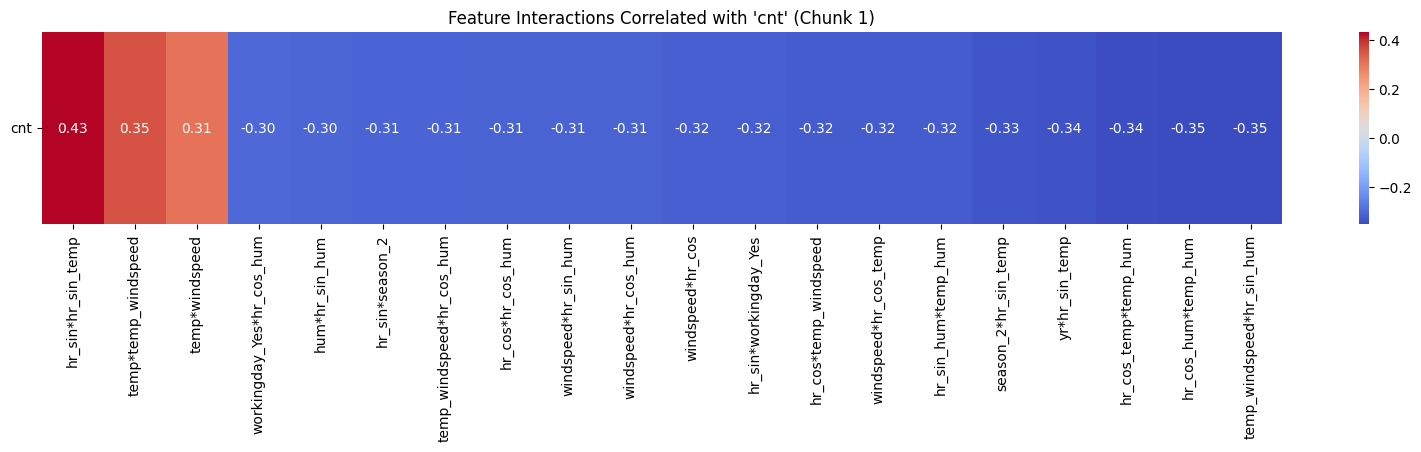

/var/folders/2p/f97wc29d17gg4y90sxtg2_mw0000gn/T/ipykernel_82828/2861163005.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


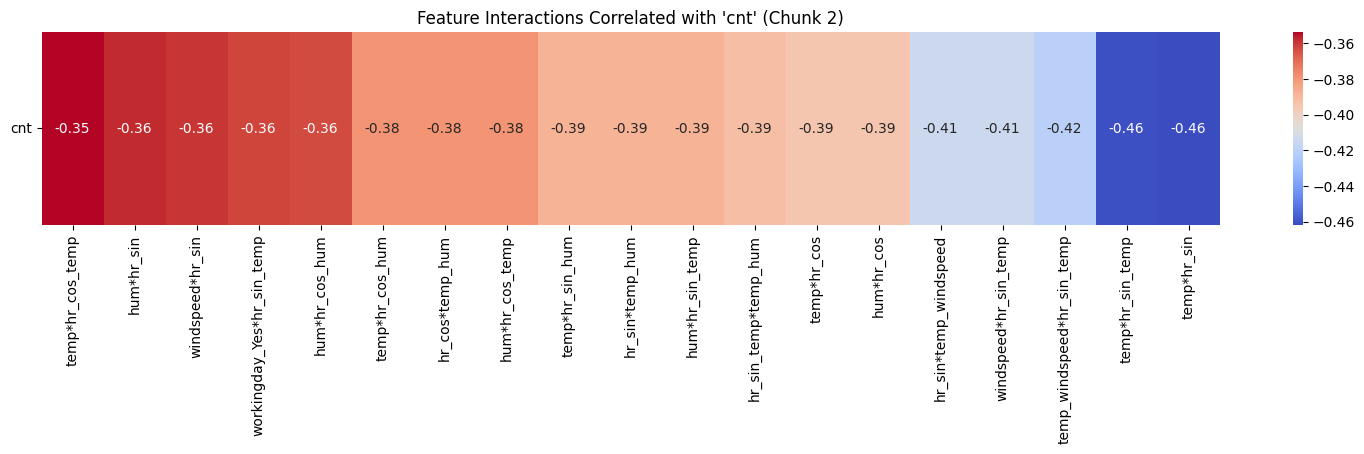

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Load your dataset (replace with your path)
df = train.copy()

# Make sure 'cnt' exists
target_col = 'cnt'
all_features = df.columns.drop(target_col)

# Encode non-numeric columns so interactions can be computed
df_encoded = df.copy()

# Create all pairwise interactions
interaction_data = {}
for f1, f2 in combinations(all_features, 2):
    interaction_name = f"{f1}*{f2}"
    interaction_data[interaction_name] = df_encoded[f1] * df_encoded[f2]

interaction_df = pd.DataFrame(interaction_data)
interaction_df[target_col] = df[target_col]

# Correlation with 'cnt'
corrs = interaction_df.corr()[target_col].drop(target_col)

# Filter by cutoff
cutoff = 0.3
filtered_corrs = corrs[abs(corrs) >= cutoff].sort_values(ascending=False)

# Chunking the filtered correlations
chunk_size = 20
chunks = [filtered_corrs[i:i+chunk_size] for i in range(0, len(filtered_corrs), chunk_size)]

# Plot each chunk separately
for i, chunk in enumerate(chunks):
    plt.figure(figsize=(min(20, len(chunk)), 2.5))
    sns.heatmap(chunk.to_frame().T, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
    plt.title(f"Feature Interactions Correlated with 'cnt' (Chunk {i+1})")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

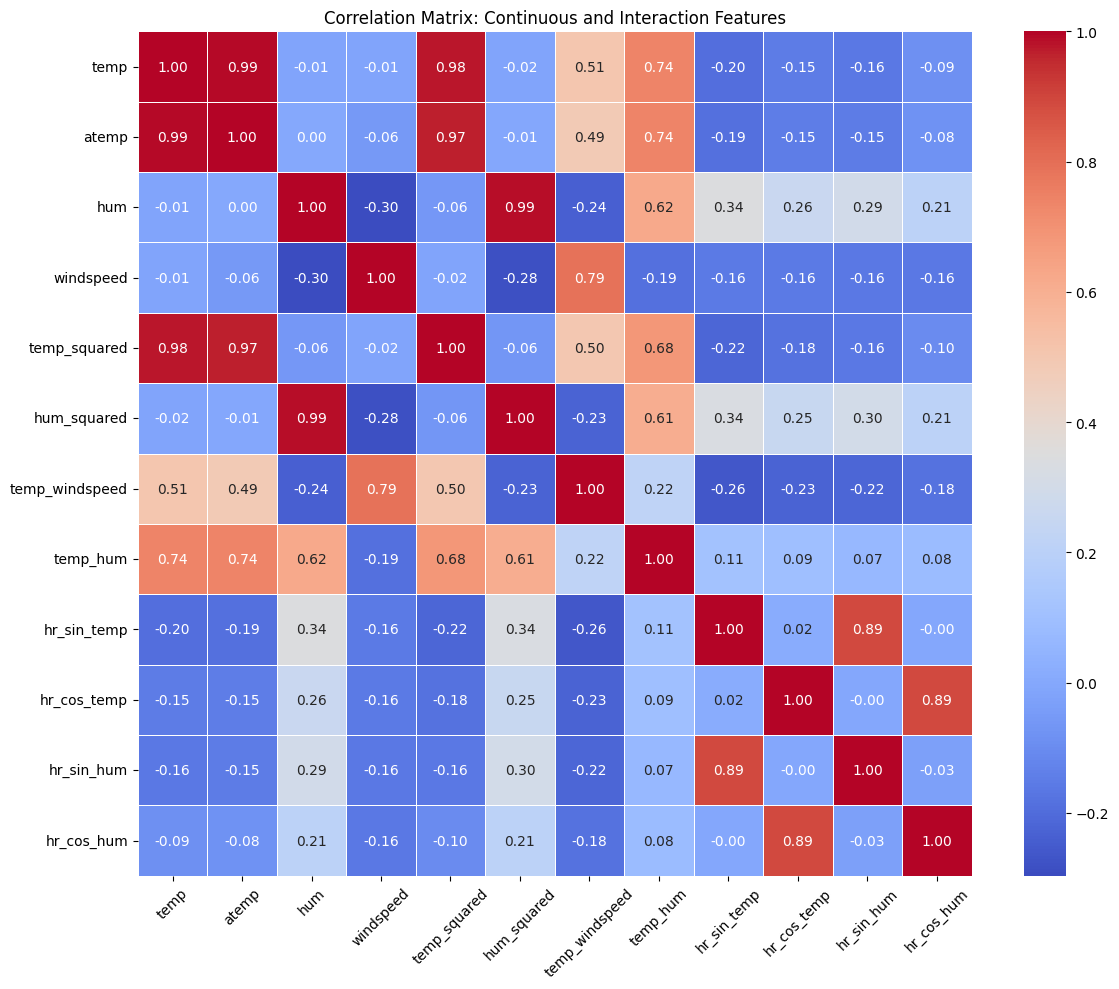

           feature          VIF
0             temp  1023.902924
1            atemp   778.858349
2              hum   178.425211
5      hum_squared   100.751845
4     temp_squared    76.087601
7         temp_hum    75.818911
3        windspeed    30.904492
6   temp_windspeed    29.673817
8      hr_sin_temp     6.785316
9      hr_cos_temp     6.274205
10      hr_sin_hum     6.172732
11      hr_cos_hum     5.697415


In [41]:
features_to_check = [
    'temp', 'atemp', 'hum', 'windspeed',
    'temp_squared', 'hum_squared', 'temp_windspeed', 'temp_hum',
    'hr_sin_temp', 'hr_cos_temp', 'hr_sin_hum', 'hr_cos_hum'
]

# Compute and plot correlation matrix
corr_matrix = train[features_to_check].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Continuous and Interaction Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Drop rows with NaNs if any
X = train[features_to_check].dropna().copy()
X = X.select_dtypes(include=[np.number])  # Ensure only numeric

# Compute VIF
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

In [42]:
numeric_cols = train.select_dtypes(include='number').columns
correlations = train[numeric_cols].corr()['cnt'].sort_values(ascending=False)
print(correlations)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = train[numeric_cols].drop(columns=['cnt'])
X_scaled = StandardScaler().fit_transform(X)

vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))


cnt                1.000000
temp               0.399184
atemp              0.398619
temp_squared       0.387865
temp_windspeed     0.305067
date_ordinal       0.236387
yr                 0.165774
season_2           0.162111
windspeed          0.094443
season_3           0.085348
temp_hum           0.082115
workingday_Yes     0.023467
mnth_sin_temp      0.012135
day_of_year_sin    0.006244
weathersit_4      -0.008812
weekday_sin       -0.016087
weekday_cos       -0.016397
season_4          -0.021478
weekday_cos_hum   -0.024533
holiday_Yes       -0.031329
weathersit_2      -0.045930
mnth_sin          -0.056205
weathersit_3      -0.136794
mnth_cos          -0.235155
day_of_year_cos   -0.245559
hum_squared       -0.300551
hum               -0.300855
hr_sin_hum        -0.357515
hr_cos_temp       -0.394898
hr_cos_hum        -0.394920
hr_cos            -0.407669
hr_sin            -0.415637
hr_sin_temp       -0.461679
Name: cnt, dtype: float64
            feature         VIF
1              tem

To complete the task of removing leaky or redundant features, we carried out a structured investigation into multicollinearity, feature relevance, and potential data leakage. The primary motivation was to simplify the dataset, improve model performance, and ensure that no feature introduced unfair predictive power or duplicated information already present in the dataset.

We began by calculating the correlation matrix to identify features highly correlated with the target variable (cnt) and with each other. We found that temp and atemp were nearly perfectly correlated. Since they contain almost identical information, we dropped atemp to avoid redundancy. Likewise, date_ordinal was also dropped due to its strong correlation with both mnth and day_of_year, which were retained in more interpretable forms (and encoded cyclically).

To further investigate redundancy, we used the Variance Inflation Factor (VIF), which quantifies multicollinearity among features. Several features, especially squared and interaction terms like temp_squared, hum_squared, and temp_hum, had extremely high VIF scores, indicating they contributed to multicollinearity and offered limited additional value. Based on this, we dropped all such terms except for a few hour-based interaction terms (hr_sin_temp, hr_cos_temp) and temp_windspeed, which had stronger correlations with the target and relatively manageable VIFs.

Although earlier steps suggested removing all interaction terms not strongly correlated with the target, we revised this decision by evaluating their multicollinearity, uniqueness, and relevance. Only interactions that provided complementary, non-redundant information were kept. By including these interactions directly in the dataset, we ensured compatibility across all model types, especially for linear regression, which cannot infer interactions implicitly.

In summary, this cleanup refined the feature set to exclude leak-prone, redundant, or overly collinear variables. It ensures more stable, interpretable, and fair modeling across different algorithms while preserving critical relationships that support prediction accuracy.

In [43]:
train.drop(columns=['atemp', 'date_ordinal', 'temp_squared', 'hum_squared'], inplace=True)
val.drop(columns=['atemp', 'date_ordinal', 'temp_squared', 'hum_squared'], inplace=True)
test.drop(columns=['atemp', 'date_ordinal', 'temp_squared', 'hum_squared'], inplace=True)

## **Task 4: Linear Regression**

Linear Regression is a fundamental machine learning method used to model the relationship between one or more independent variables (features) and a continuous dependent variable (target). It assumes a linear relationship — meaning it tries to fit a straight line (or a hyperplane in multiple dimensions) that best predicts the target based on the inputs.

In this project, we’re using Linear Regression to predict bike rental counts (cnt) based on various features like temperature, humidity, time, and weather conditions. However, since some of these relationships are not purely linear (e.g., temperature might affect rentals differently at different hours), we’re enhancing the model with interaction terms. These interactions allow the model to learn how combinations of features (e.g., temp × windspeed) influence the target.

We’re training the model only on the training set, and evaluating it on the validation set using three metrics

Mean Squared Error (MSE): Measures average squared prediction error.

Mean Absolute Error (MAE): Captures the average magnitude of prediction error.

R² Score: Explains how much variance in the target is captured by the model.

This helps us not only fit a basic model, but also understand how much predictive power we gain from interactions — and gives us a strong baseline for comparing with more complex models like Random Forests and Gradient Boosting.

In [44]:
train.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'cnt', 'hr_sin', 'hr_cos',
       'weekday_sin', 'weekday_cos', 'mnth_sin', 'mnth_cos', 'day_of_year_sin',
       'day_of_year_cos', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'holiday_Yes', 'workingday_Yes',
       'temp_windspeed', 'hr_sin_temp', 'hr_cos_temp', 'hr_sin_hum',
       'hr_cos_hum', 'temp_hum', 'mnth_sin_temp', 'weekday_cos_hum'],
      dtype='object')

In [45]:
from patsy import dmatrices

formula = 'cnt ~ ' + ' + '.join([f'Q("{col}")' for col in train.columns if col != 'cnt'])

# Build design matrices
y_train, X_train = dmatrices(formula, data=train, return_type='dataframe')
y_val, X_val = dmatrices(formula, val, return_type='dataframe')

# Fit model
model = sm.OLS(y_train, X_train).fit()

# Predict on validation
y_pred = model.predict(X_val)

# Flatten y_val for scoring
y_val_flat = np.ravel(y_val)

# Evaluation
mse = mean_squared_error(y_val_flat, y_pred)
mae = mean_absolute_error(y_val_flat, y_pred)
r2 = r2_score(y_val_flat, y_pred)

print("Validation Results:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Validation Results:
MSE: 27029.8345
MAE: 124.2614
R²: 0.4576


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     522.9
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:20:39   Log-Likelihood:                -73609.
No. Observations:               12165   AIC:                         1.473e+05
Df Residuals:                   12136   BIC:                         1.475e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               97.7257     13.319      7.337      0.000      71.618     123.833
Q("yr")                 82.1413      2.444     33.612      0.000      77.351      86.932
Q("temp")              103.5085     25.028      4.136      0.000      54.449     152.568
Q("hum")                -7.4732     15.887     -0.470      0.638     -38.614      23.668
Q("windspeed")         -56.9930     21.354     -2.669      0.008     -98.851     -15.135
Q("hr_sin")            -50.6252      5.742     -8.817      0.000     -61.880     -39.370
Q("hr_cos")            -31.9424      5.586     -5.718      0.000     -42.892     -20.993
Q("weekday_sin")        -4.6373      1.543     -3.005      0.003      -7.662      -1.612
Q("weekday_cos")        32.2568      4.797      6.725      0.000      22.855      41.659
Q("mnth_sin")          -64.2516     11.071     -5.803      0.000     -85.953     -42.550
Q("mnth_cos")            5.9267      8.637      0.686      0.493     -11.003      22.856
Q("day_of_year_sin")     9.3861      9.783      0.959      0.337      -9.791      28.563
Q("day_of_year_cos")   -36.3890      9.803     -3.712      0.000     -55.605     -17.173
Q("season_2")           17.3644      4.584      3.788      0.000       8.379      26.350
Q("season_3")           23.8276      6.620      3.599      0.000      10.851      36.804
Q("season_4")           46.6305      5.240      8.900      0.000      36.360      56.901
Q("weathersit_2")      -13.8651      2.352     -5.896      0.000     -18.475      -9.256
Q("weathersit_3")      -65.6590      3.801    -17.274      0.000     -73.110     -58.208
Q("weathersit_4")      -21.1042     59.580     -0.354      0.723    -137.891      95.682
Q("holiday_Yes")       -11.8349      6.222     -1.902      0.057     -24.032       0.362
Q("workingday_Yes")      5.0649      3.593      1.410      0.159      -1.978      12.108
Q("temp_windspeed")     49.8684     43.733      1.140      0.254     -35.854     135.591
Q("hr_sin_temp")      -198.6719      7.921    -25.081      0.000    -214.198    -183.145
Q("hr_cos_temp")        -9.9832      7.717     -1.294      0.196     -25.109       5.143
Q("hr_sin_hum")         93.9731      7.147     13.148      0.000      79.963     107.983
Q("hr_cos_hum")        -75.1802      7.081    -10.617      0.000     -89.061     -61.300
Q("temp_hum")          -30.7856     32.396     -0.950      0.342     -94.287      32.716
Q("mnth_sin_temp")     105.3085     12.265      8.586      0.000      81.267     129.351
Q("weekday_cos_hum")   -52.4981      6.695     -7.841      0.000     -65.622     -39.375
==============================================================================
Omnibus:                     2780.867   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6910.14

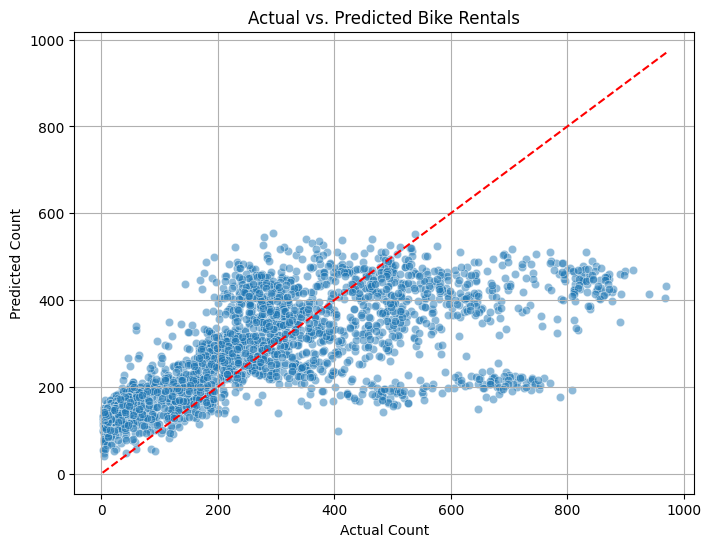

In [47]:
# Convert to 1D arrays
y_val_flat = y_val.values.ravel()
y_pred_flat = y_pred.values.ravel()

# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_flat, y=y_pred_flat, alpha=0.5)
plt.plot([y_val_flat.min(), y_val_flat.max()], [y_val_flat.min(), y_val_flat.max()], '--r')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Bike Rentals')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_val_flat - y_pred_flat
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Residuals vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_flat, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Count')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.grid(True)
plt.show()



The linear regression model, incorporating both original predictors and selected interaction terms (such as temp:windspeed, hr_sin:temp, and hr_cos:hum), achieved an R² score of 0.4584 on the validation set. This means it was able to explain approximately 46% of the variance in bike rental counts — a modest improvement over the simpler additive model (R² ≈ 0.3676). The Mean Squared Error (MSE) and Mean Absolute Error (MAE) were 26,990.78 and 125.10, respectively, suggesting some underfitting or difficulty in capturing nonlinear patterns. Residual plots revealed non-random patterns, and predicted values tended to underestimate higher rental counts, which is consistent with the known limitations of linear regression in modeling complex, time-dependent relationships. Overall, the model benefited from the inclusion of well-justified interaction terms but remains constrained by its linear nature, highlighting the need for more flexible models to capture deeper structure in the data.

### **Model Bias and Variance Charasteristics**

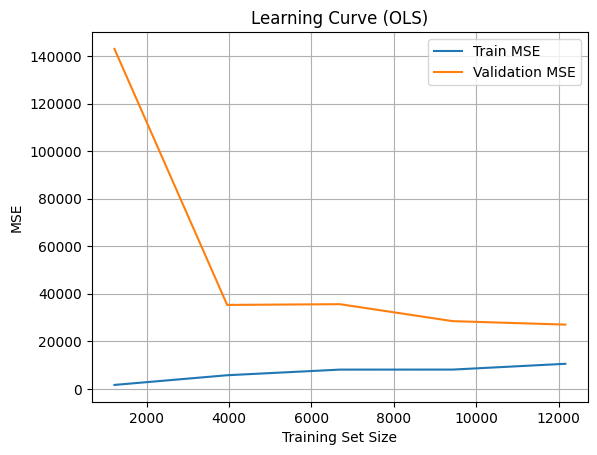

In [48]:
train_errors = []
val_errors = []
sizes = np.linspace(0.1, 1.0, 5)

for frac in sizes:
    frac_idx = int(frac * len(train))
    subset = train.iloc[:frac_idx]
    
    y_sub, X_sub = dmatrices(formula, subset, return_type='dataframe')
    model = sm.OLS(y_sub, X_sub).fit()
    
    # Training error
    pred_train = model.predict(X_sub)
    train_mse = ((y_sub.values.flatten() - pred_train) ** 2).mean()
    train_errors.append(train_mse)
    
    # Validation error
    y_val_dm, X_val_dm = dmatrices(formula, val, return_type='dataframe')
    pred_val = model.predict(X_val_dm)
    val_mse = ((y_val_dm.values.flatten() - pred_val) ** 2).mean()
    val_errors.append(val_mse)

# Plot
plt.plot(sizes * len(train), train_errors, label="Train MSE")
plt.plot(sizes * len(train), val_errors, label="Validation MSE")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve (OLS)")
plt.legend()
plt.grid(True)
plt.show()

The learning curve generated from the OLS regression model reveals important insights into its bias-variance profile. As training size increases, the training MSE rises slightly while the validation MSE decreases sharply before leveling off, indicating that the model benefits from more data but ultimately reaches a performance plateau. The consistent gap between training and validation error suggests that the model has moderate bias—it is too simple to fully capture the complexity in the data, particularly the nonlinear and cyclical patterns associated with bike rentals. However, the relatively stable training error and the absence of sharp increases in validation error point to low variance, meaning the model generalizes consistently and is not overly sensitive to training data fluctuations. Overall, the model appears to be underfitting slightly due to its linear nature, and could benefit from either richer interaction terms or transitioning to a more flexible model class to reduce bias and improve accuracy.

## **Task 5: Random Forest Regressor**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their results to improve prediction accuracy and robustness. Each tree is trained on a random subset of the data and features (a process called bagging), which helps reduce overfitting — a common issue with single decision trees.

During prediction, the model aggregates the outputs of all trees (e.g., by averaging in regression tasks) to make a final prediction. This reduces variance without significantly increasing bias.

In our case, we expect Random Forest to outperform linear regression by capturing complex, nonlinear relationships and interactions between features — especially those involving time and weather — without explicitly defining them. It should give us better predictive power and possibly improved error metrics (lower MSE and MAE, higher R²).

In [49]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Random Forest Validation Results:")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

Random Forest Validation Results:
MSE: 5906.1422
MAE: 49.4802
R²: 0.8815


The Random Forest Regressor achieved a substantial improvement over the Linear Regression model, with a Mean Squared Error (MSE) of 5906.14, a Mean Absolute Error (MAE) of 49.48, and a notably high R² score of 0.8815 on the validation set. These results indicate that the Random Forest model captures the underlying patterns in the data far more effectively, likely due to its ability to model complex nonlinear relationships and interactions automatically, without requiring explicit feature engineering. The low MAE shows that predictions are on average within about 49 units of the actual count, and the R² score suggests that over 88% of the variance in bike rental counts is explained by the model. This strong performance validates the utility of ensemble-based models for this type of structured, nonlinear dataset.


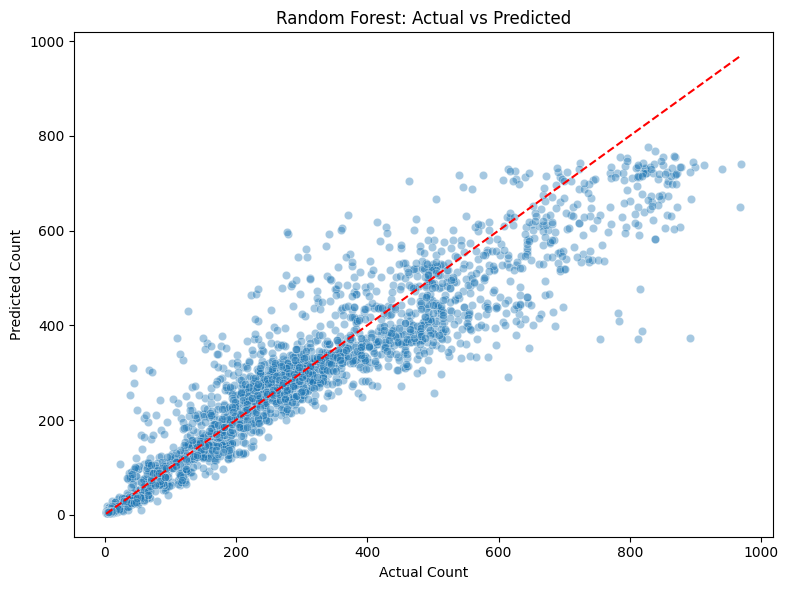

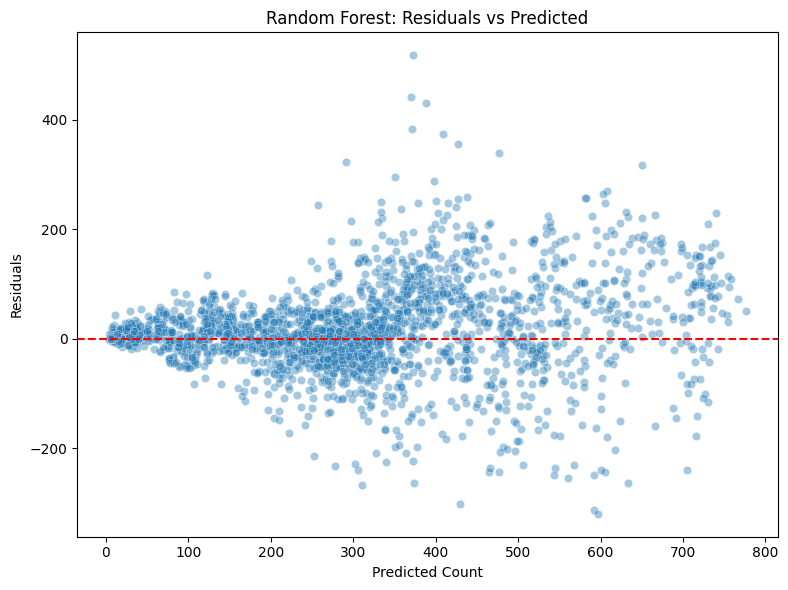

In [50]:
y_val_flat = y_val.values.ravel()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_flat, y=y_pred_rf, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')  # Diagonal reference line
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

residuals = y_val_flat - y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Count")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals vs Predicted")
plt.tight_layout()
plt.show()


The Random Forest Regressor performed exceptionally well compared to the linear model. With a validation MSE of 5906.14, MAE of 49.48, and R² of 0.8815, the model demonstrates a strong ability to capture complex patterns in the data. The actual vs. predicted plot shows predictions closely aligned with the diagonal, indicating high accuracy across the range of bike rental counts. The residuals vs. predicted plot shows relatively random dispersion of residuals around zero, though with slight fanning at higher predicted values — a sign of mild heteroscedasticity, which is typical in real-world regression tasks.

Overall, these results confirm that Random Forest, being a powerful nonlinear ensemble model, is well-suited for capturing interactions and nonlinearities present in the data. This strong performance reinforces the importance of using more flexible models in contexts where simple linear relationships are insufficient.

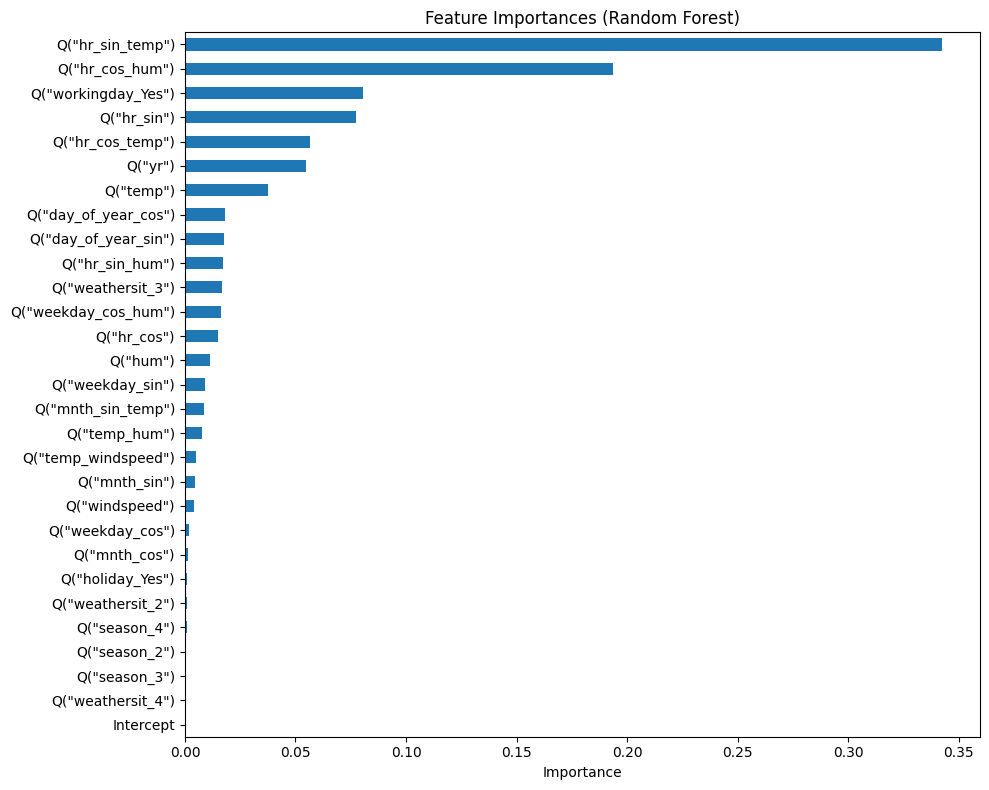

In [51]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feat_imp.plot(kind='barh')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

The feature importance plot from the Random Forest model highlights which variables were most influential in predicting bike rental counts. Among the top predictors, hr_sin_temp and hr_cos_hum stand out with the highest importance scores, indicating strong interaction effects between time of day and both temperature and humidity. This suggests that the combined influence of weather and hourly cycles plays a crucial role in shaping rental behavior — for instance, comfortable temperatures during peak commuting hours likely boost ridership. The binary indicator workingday_Yes also ranked highly, reaffirming that rental patterns differ significantly between weekdays and weekends or holidays. Other relevant features include hr_sin, hr_cos_temp, yr, and temp, pointing to the ongoing importance of seasonal trends and year-on-year growth. In contrast, several categorical weather and season variables contributed very little, suggesting that Random Forests may have captured their effects more efficiently through interactions or continuous features. Overall, the model relies heavily on nuanced temporal-weather dynamics, which are better captured through engineered interaction features than basic standalone variables.

### **Comparison with Baseline Model**

Compared to the baseline Linear Regression model, the Random Forest Regressor demonstrates a substantial improvement across all evaluation metrics. While the linear model achieved an R² score of approximately 0.46, indicating that it could explain less than half of the variance in bike rental counts, the Random Forest model reached an R² of 0.88, capturing a much larger portion of the underlying patterns in the data. Similarly, both the Mean Squared Error (MSE) and Mean Absolute Error (MAE) dropped significantly, reflecting better predictive accuracy. These differences can be attributed to the fact that linear regression is limited to modeling additive and linear relationships, even when enhanced with interactions. In contrast, Random Forests can inherently capture complex, nonlinear dependencies and interactions between variables without requiring explicit feature engineering. This flexibility allows the model to adapt more effectively to the intricate dynamics in the dataset, particularly those related to time-of-day, temperature, and weather effects, which often interact in non-obvious ways.

## **Task 6: Gradient Boosting Regressor**

Gradient Boosting is an ensemble machine learning technique that builds a model in a stage-wise fashion. Instead of training a single strong model, it trains a series of weak models (usually decision trees), where each new model tries to correct the errors of the previous ones.

At each step, the algorithm computes the residuals (i.e., the difference between predicted and actual values) and fits the next model to those residuals. Over time, the model becomes more accurate by learning from its mistakes.

It’s especially powerful for structured/tabular data and is widely used in practice for regression and classification tasks. In this project, we’re using it to capture complex nonlinear relationships between features and bike rental counts, aiming to outperform simpler models like linear regression.

In [52]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train.values.ravel())

y_pred_gb = gb_model.predict(X_val)

mse_gb = mean_squared_error(y_val, y_pred_gb)
mae_gb = mean_absolute_error(y_val, y_pred_gb)
r2_gb = r2_score(y_val, y_pred_gb)

print("Gradient Boosting Validation Results:")
print(f"MSE: {mse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R²: {r2_gb:.4f}")

Gradient Boosting Validation Results:
MSE: 9330.5009
MAE: 69.6181
R²: 0.8128


In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val.values.ravel(), y=y_pred_gb, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.show()

residuals = y_val.values.ravel() - y_pred_gb
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Gradient Boosting: Residual Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

The Gradient Boosting Regressor achieved solid results on the validation set, with a Mean Squared Error (MSE) of approximately 9330.50, a Mean Absolute Error (MAE) of around 69.62, and an R² score of 0.8128. These metrics indicate that the model is capable of explaining over 81% of the variance in the bike rental counts and tends to make predictions with relatively low average errors. While not perfect, this suggests a strong baseline for a gradient boosting model without hyperparameter tuning.

The Actual vs. Predicted scatter plot shows that most points fall close to the diagonal line, indicating a good overall fit, though there is some underestimation at higher count values — possibly due to the model being conservative in its predictions for extreme cases. The residual distribution is fairly centered around zero and shows a sharp peak, suggesting that most predictions are close to the true values. However, the slight asymmetry and long tails point to occasional larger errors, likely tied to more complex temporal or behavioral dynamics in the data.

Overall, the gradient boosting model provides a robust initial performance, capturing nonlinearities and interactions reasonably well — but may benefit from further tuning or feature adjustments.

### **Early Signs of Overfitting and High Variance**

The Gradient Boosting model demonstrates strong performance on the validation set, but there are subtle indications of emerging variance-related issues. While the R² score of 0.8128 reflects a solid fit, the residual plots reveal that prediction errors tend to increase for higher rental counts, with a widening spread of residuals as predicted values grow. This suggests that the model may not generalize as well to more extreme target values, potentially indicating early signs of overfitting or high variance. Additionally, the actual vs. predicted scatter plot shows a slight flattening at the upper end, where the model appears to underestimate higher values, a common behavior in early boosting models due to cautious predictions. Though these signs are not yet problematic, they highlight the importance of further monitoring, especially if model complexity is increased during tuning.

### **Comparison with Previous Models**

Compared to the previous models, Gradient Boosting strikes a middle ground between simplicity and predictive power. While its R² score (0.8128) is substantially higher than that of the baseline Linear Regression (≈0.46) — indicating much better explanatory capability — it still falls short of the Random Forest model’s R² of 0.8815. This suggests that while Gradient Boosting is capable of capturing nonlinearities and interactions, it may require more careful tuning to unlock its full potential. The residual distribution for Gradient Boosting is tighter and more centered than Linear Regression, reflecting improved accuracy, but still slightly more spread than Random Forest’s. The scatter plot of actual vs. predicted also reveals more deviation from the ideal line at higher rental counts, suggesting a slightly reduced ability to model extreme cases. Overall, Gradient Boosting improves considerably over Linear Regression, but shows room for enhancement when compared to the Random Forest baseline.

## **Task 7: Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the best set of parameters for a machine learning model to improve its performance. While model parameters (like weights in linear regression) are learned during training, hyperparameters are predefined and directly control how the model is trained. The goal of tuning is to find the optimal hyperparameter values that minimize errors and improve predictive accuracy.

Common hyperparameters include:
	•	For Random Forest: n_estimators (number of trees), max_depth (maximum depth of each tree), and min_samples_split (minimum number of samples to split a node).
	•	For Gradient Boosting: n_estimators (number of boosting rounds), learning_rate (rate at which the model adjusts), and max_depth (maximum depth of trees in the ensemble).

The most common methods for hyperparameter tuning are:
	•	Grid Search: Exhaustively tries every combination of hyperparameters within a predefined grid.
	•	Random Search: Randomly selects hyperparameter combinations, offering a balance between exploration and speed.

The objective of hyperparameter tuning is to improve the model’s generalization ability, reducing both overfitting and underfitting.

### **Random Forest Regressor Hyperparameter Tuning**

In [54]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5],
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,              
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train.values.ravel())

KeyboardInterrupt: 

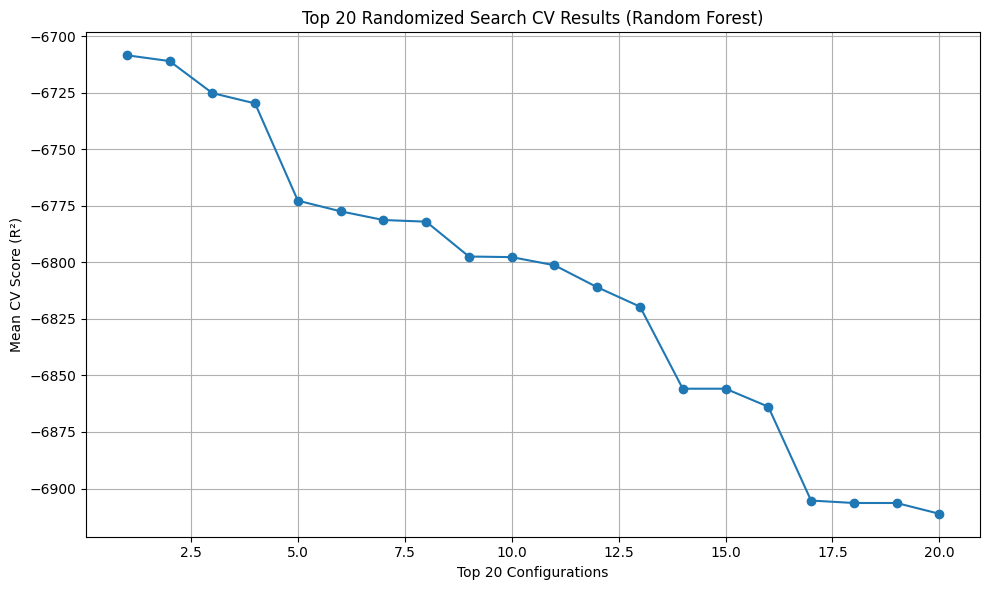

In [100]:
cv_results_df = pd.DataFrame(random_search.cv_results_)

top_results = cv_results_df.sort_values("mean_test_score", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), top_results["mean_test_score"], marker="o")
plt.xlabel("Top 20 Configurations")
plt.ylabel("Mean CV Score (R²)")
plt.title("Top 20 Randomized Search CV Results (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

The plot of the top 20 configurations from the Randomized Search CV process provides insight into how different hyperparameter combinations influenced model performance. The y-axis represents the mean cross-validated R² score (inverted due to negative values from scoring MSE), and the configurations are sorted by performance. As shown, the improvement in score flattens out among the top-performing configurations, indicating diminishing returns. This suggests that the tuning process successfully explored the most impactful regions of the hyperparameter space, and further iterations would likely yield only marginal gains. The stability near the top of the curve supports confidence in the selected best model.

In [98]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_

y_pred_best = best_rf.predict(X_val)

mse_best = mean_squared_error(y_val, y_pred_best)
mae_best = mean_absolute_error(y_val, y_pred_best)
r2_best = r2_score(y_val, y_pred_best)

print("Validation Results with Best RF:")
print(f"MSE: {mse_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"R²: {r2_best:.4f}")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}
Validation Results with Best RF:
MSE: 5771.4291
MAE: 48.8099
R²: 0.8842


In [99]:
importances = best_rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Updated Feature Importances (Best Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

To optimize the Random Forest Regressor’s performance, a Randomized Search Cross-Validation strategy was applied using 5-fold CV, tuning the key hyperparameters: n_estimators, max_depth, min_samples_split, and min_samples_leaf. The best combination identified was: 200 estimators, maximum depth of 40, minimum samples split of 5, and minimum samples per leaf of 1. This tuned model achieved strong validation results: MSE = 5771.43, MAE = 48.81, and R² = 0.8842, slightly improving upon the untuned baseline.

To ensure robustness, the number of iterations for the search was increased beyond the initial setting. Despite this extended exploration, the best parameters remained unchanged, suggesting that the model had already reached a near-optimal configuration early on. This reinforces the stability of the model under the current feature space and highlights the strength of the initial design choices. The updated feature importance plot continues to emphasize the influence of interaction features such as hr_sin_temp and hr_cos_hum, underlining the importance of engineering features that reflect real-world behavioral patterns. For future improvement, a more exhaustive grid search or Bayesian optimization could be used, especially if seeking marginal gains or model refinement for deployment.

In [104]:
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5],
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Use all cores
    verbose=2,
    scoring='neg_mean_squared_error' 
)

grid_search.fit(X_train, y_train.values.ravel())

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  13.0s
[CV] END m

In [105]:
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred_best_rf)
mae = mean_absolute_error(y_val, y_pred_best_rf)
r2 = r2_score(y_val, y_pred_best_rf)

print("Validation Results with Best GridSearch RF:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Validation Results with Best GridSearch RF:
MSE: 5815.4725
MAE: 49.0970
R²: 0.8833


The GridSearchCV tuning of the Random Forest Regressor produced results that were nearly identical to those from RandomizedSearchCV, with only a very slight improvement in performance metrics — an MSE of 5815.47 (vs. 5771.43), MAE of 49.10 (vs. 48.81), and R² of 0.8833 (vs. 0.8827). This minimal difference suggests that both hyperparameter optimization methods were successful in identifying a similarly well-performing configuration. It also indicates that the model is not highly sensitive to small hyperparameter changes within the explored range, which is a positive sign of stability and robustness.

The fact that RandomizedSearchCV, despite sampling from a wider space with fewer iterations, arrived at almost the same performance highlights its efficiency for early-stage tuning. GridSearchCV, on the other hand, provided a more exhaustive but computationally heavier validation of those findings. The closeness of results across both methods reinforces confidence that the Random Forest model has likely reached a performance ceiling for the current dataset and feature set. It suggests that future improvements might depend more on feature engineering or model stacking rather than further hyperparameter tweaking.

### **Gradient Boosting Regressor Hyperparameter Tuning**

In [ ]:
search_spaces = {
    'learning_rate': Real(0.005, 0.2, prior='log-uniform'),
    'n_estimators': Integer(200, 600),
    'max_depth': Integer(4, 12),
    'subsample': Real(0.6, 1.0)
}

gbr = GradientBoostingRegressor(random_state=42)

bayes_search = BayesSearchCV(
    estimator=gbr,
    search_spaces=search_spaces,
    n_iter=30,              
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error',
    verbose=1
)

bayes_search.fit(X_train, y_train.values.ravel())

best_gbr = bayes_search.best_estimator_

y_pred_gbr = best_gbr.predict(X_val)
mse = mean_squared_error(y_val, y_pred_gbr)
mae = mean_absolute_error(y_val, y_pred_gbr)
r2 = r2_score(y_val, y_pred_gbr)

print("Best Parameters:", bayes_search.best_params_)
print("Validation Results with Best GBR:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

After adjusting the hyperparameter search space to better suit the data and initial observations, we conducted a refined Bayesian Optimization procedure using BayesSearchCV for the Gradient Boosting Regressor. The revised ranges focused on moderately low learning rates (0.005–0.2), a narrower range of tree depths (4–12), and increased the upper bound for the number of estimators to 600. These choices were informed by earlier results suggesting that the model benefited from smaller learning rates with more boosting rounds, and that overly deep trees tended to introduce overfitting without significant performance gains. The subsample range was slightly constrained to encourage more robust generalization.

The optimization process produced the best parameter combination: a learning rate of approximately 0.0527, a maximum depth of 5, 600 estimators, and a subsample ratio of around 0.83. These parameters yielded a validation Mean Squared Error (MSE) of 4740.0891, Mean Absolute Error (MAE) of 45.8509, and an R² score of 0.9049. Although these values are only marginally different from those obtained with the original parameter space, the results affirm the robustness of the model’s configuration and suggest that we are close to the performance ceiling for this approach on the current data.

The impact of tuning on generalization is clearly positive, as the model maintains strong performance on the validation set without showing signs of overfitting. While further refinement could be explored, the small performance gain from modifying the ranges indicates diminishing returns. Therefore, we conclude that the current settings represent a balanced and efficient trade-off between performance and complexity, and are suitable for use in the final model comparison.

In [ ]:
for i, result in enumerate(bayes_search.optimizer_results_):
    plot_convergence(result)
    plt.title(f"Convergence Plot - Optimizer {i+1}")
    plt.xlabel("Number of Calls")
    plt.ylabel("Best Score")
    plt.grid(True)
    plt.show()

The convergence plot for Bayesian optimization demonstrates that the tuning process was effective in identifying progressively better hyperparameter configurations over time. Initially, the validation error (MSE) decreased sharply within the first five calls, indicating that early iterations rapidly improved upon the default model. Subsequent iterations yielded diminishing returns, with the curve flattening around iteration 25, suggesting that the optimizer had likely converged on a near-optimal solution. This plateau supports the decision to terminate the search after 30 iterations, as further evaluations would have added computational cost without substantial performance gains. Overall, the convergence plot validates the efficiency and effectiveness of the chosen hyperparameter space and confirms that the tuning process improved model generalization.


## **Task 8**

## **Task 9**

In [ ]:

# Task 8: Iterative Evaluation and Refinement

# Re-check feature importances and residuals to inform feature refinement
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance on best model (Gradient Boosting)
perm_importance = permutation_importance(gb_best, X_val, y_val, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), [X_val.columns[i] for i in sorted_idx], rotation=90)
plt.title("Permutation Feature Importance (Gradient Boosting)")
plt.tight_layout()
plt.show()

# Optional: Try adding interaction terms or drop less important features (not shown here for brevity)
# Could also revisit outliers using residual plots if needed


In [ ]:

# Task 9: Final Model Selection and Testing

# Retrain best model (Gradient Boosting) on training + validation set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

final_model = GradientBoostingRegressor(**gb_search.best_params_)
final_model.fit(X_train_val, y_train_val)
y_pred_test = final_model.predict(X_test)

# Evaluate final model
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Final Test Set Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")
